
# Investigate a Dataset Project: Per Capita Income Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

> Using **the Economy dataset in Gapminder World**, I investigate the relationship between *Per Capita Income (as the dependent variable) and three independent variables which are: Trade Balance (as % of GDP), Tax Revenues (as % of GDP), and Foreign Direct Investment Flows (as % of GDP)*

> I believe that the level of income citizens enjoy, is a result of efforts that have been made over the years. So, my analysis depends on looking at the dependent variable in a time snapshot (a selected year) and investigating the developments in the independent variables over previous decades, so that I can find common patterns for the countires with highest level of per capita income (as well as those countires with lowest level of per capita income) with regard to these independent variables.

> The data of the dependent variable (Per Capita Income) spans from the year 1800 till 2040, whereas the three independent variables range from 1960s and 1970s till 2019. Therefore, I'll use 2019 as the time snapshot used for analyzing the dependent variable, and then investigate the independent variables over their course of time, in order to figure out the sort of association between the dependent variable and the independent variables.

> **In this analysis, I'll address these questions:**
- Is there a relation between trade balance and the per capita income level?
- Is there a relation between tax revenues and the per capita income level?
- Is there a relation between FDI affect the per capita income level?


In [1]:
# Importing all libraries that I might need
import pandas as pd
import numpy as np
import requests
import re
import tweepy
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling

>  In this section of the report, I'll load the data of the dependent and independent variables, check for cleanliness, and then trim and clean my dataset for analysis.

### 2.1 Dependent Variable: Per Capita Income
- This is the dependent variable that I'll study: **Income per person or GDP per capita (in fixed US dollars)**
- (Fixed US dollars) means that the income is measured in US dollars after removing the effect of inflation
- This data spans from 1800 to 2040
- For simplicity, I'll refer to it as **Per Capita Income** in comments, conclusion or markdown cells

In [2]:
# Reading csv file
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...    \
0  Afghanistan   603   603   603   603   603   603   603   603   603  ...     
1      Albania   667   667   667   667   667   668   668   668   668  ...     
2      Algeria   715   716   717   718   719   720   721   722   723  ...     
3      Andorra  1200  1200  1200  1200  1210  1210  1210  1210  1220  ...     
4       Angola   618   620   623   626   628   631   634   637   640  ...     

    2031   2032   2033   2034   2035   2036   2037   2038   2039   2040  
0   2550   2600   2660   2710   2770   2820   2880   2940   3000   3060  
1  19400  19800  20200  20600  21000  21500  21900  22300  22800  23300  
2  14300  14600  14900  15200  15500  15800  16100  16500  16800  17100  
3  73600  75100  76700  78300  79900  81500  83100  84800  86500  88300  
4   6110   6230   6350   6480   6610   6750   6880   7020   7170   7310  

[5 rows x 242 columns]

In [3]:
# As will be shown, there're no NaNs
income.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 242 columns):
country    193 non-null object
1800       193 non-null int64
1801       193 non-null int64
1802       193 non-null int64
1803       193 non-null int64
1804       193 non-null int64
1805       193 non-null int64
1806       193 non-null int64
1807       193 non-null int64
1808       193 non-null int64
1809       193 non-null int64
1810       193 non-null int64
1811       193 non-null int64
1812       193 non-null int64
1813       193 non-null int64
1814       193 non-null int64
1815       193 non-null int64
1816       193 non-null int64
1817       193 non-null int64
1818       193 non-null int64
1819       193 non-null int64
1820       193 non-null int64
1821       193 non-null int64
1822       193 non-null int64
1823       193 non-null int64
1824       193 non-null int64
1825       193 non-null int64
1826       193 non-null int64
1827       193 non-null int64
1828       193 non-null

In [4]:
income.describe()

1800         1801         1802         1803         1804  \
count   193.000000   193.000000   193.000000   193.000000   193.000000   
mean    978.523316   978.948187   980.725389   980.922280   981.911917   
std     579.633227   579.915248   582.565512   582.032626   583.963199   
min     250.000000   250.000000   249.000000   249.000000   249.000000   
25%     592.000000   592.000000   592.000000   592.000000   592.000000   
50%     817.000000   822.000000   826.000000   831.000000   836.000000   
75%    1160.000000  1170.000000  1170.000000  1170.000000  1170.000000   
max    3840.000000  3840.000000  3840.000000  3840.000000  3840.000000   

              1805         1806         1807         1808         1809  \
count   193.000000   193.000000   193.000000   193.000000   193.000000   
mean    982.502591   982.829016   985.419689   980.937824   982.393782   
std     584.043985   584.097850   590.514505   578.200194   581.878397   
min     249.000000   248.000000   248.000000   248.000000   248.000000   
25%     593.000000   593.000000   593.000000   593.000000   593.000000   
50%     836.000000   836.000000   836.000000   836.000000   836.000000   
75%    1170.000000  1170.000000  1170.000000  1160.000000  1170.000000   
max    3840.000000  3840.000000  3840.000000  3840.000000  3840.000000   

           ...                 2031           2032           2033  \
count      ...           193.000000     193.000000     193.000000   
mean       ...         23142.378238   23613.119171   24083.461140   
std        ...         23670.673835   24162.379036   24635.072766   
min        ...           557.000000     566.000000     577.000000   
25%        ...          5180.000000    5280.000000    5380.000000   
50%        ...         15400.000000   15700.000000   16000.000000   
75%        ...         34200.000000   34800.000000   35500.000000   
max        ...        149000.000000  153000.000000  156000.000000   

                2034           2035           2036           2037  \
count     193.000000     193.000000     193.000000     193.000000   
mean    24577.430052   25077.678756   25576.476684   26107.564767   
std     25136.440969   25646.475260   26138.360102   26707.571366   
min       588.000000     600.000000     612.000000     625.000000   
25%      5490.000000    5600.000000    5710.000000    5830.000000   
50%     16400.000000   16700.000000   17000.000000   17400.000000   
75%     36200.000000   37000.000000   37700.000000   38500.000000   
max    159000.000000  162000.000000  165000.000000  169000.000000   

                2038           2039           2040  
count     193.000000     193.000000     193.000000  
mean    26635.953368   27180.512953   27730.725389  
std     27233.418469   27813.430077   28356.570830  
min       637.000000     650.000000     664.000000  
25%      5950.000000    6070.000000    6190.000000  
50%     17700.000000   18100.000000   18500.000000  
75%     39300.000000   40100.000000   40900.000000  
max    172000.000000  176000.000000  179000.000000  

[8 rows x 241 columns]

### Reshaping dataframe:
- The original dataset shows years as columns & countries as rows. We need to reshape it so the years are shown as rows and countries as columns

In [5]:
# Reshaping using transpose
new_income= income.set_index('country')

In [6]:
income_tr = new_income.transpose()
income_tr

country  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
1800             603      667      715     1200     618                  757   
1801             603      667      716     1200     620                  757   
1802             603      667      717     1200     623                  757   
1803             603      667      718     1200     626                  757   
1804             603      667      719     1210     628                  757   
1805             603      668      720     1210     631                  757   
1806             603      668      721     1210     634                  757   
1807             603      668      722     1210     637                  758   
1808             603      668      723     1220     640                  758   
1809             603      668      724     1220     642                  758   
1810             604      668      725     1220     645                  758   
1811             604      668      726     1220     648                  758   
1812             604      668      727     1220     651                  758   
1813             604      668      728     1230     654                  758   
1814             604      668      729     1230     657                  758   
1815             604      669      730     1230     660                  758   
1816             604      669      731     1230     662                  759   
1817             604      669      732     1240     665                  759   
1818             604      669      733     1240     668                  759   
1819             604      669      734     1240     671                  759   
1820             604      669      735     1240     674                  759   
1821             607      671      743     1260     677                  764   
1822             609      672      751     1270     680                  769   
1823             611      674      759     1290     683                  775   
1824             613      675      767     1300     686                  780   
1825             615      677      775     1320     689                  785   
1826             617      678      784     1330     692                  790   
1827             619      680      792     1350     695                  796   
1828             621      681      801     1370     698                  801   
1829             623      683      810     1380     701                  806   
...              ...      ...      ...      ...     ...                  ...   
2011            1630    10200    13000    42000    6350                20000   
2012            1770    10400    13200    41900    6650                20400   
2013            1810    10500    13300    43700    6730                20100   
2014            1800    10700    13500    44900    6810                20800   
2015            1770    11000    13800    46600    6650                21400   
2016            1760    11400    13900    48200    6260                22400   
2017            1760    11800    13900    49800    6050                22900   
2018            1740    12300    13900    51500    5730                23800   
2019            1760    12700    14000    53200    5540                24500   
2020            1800    13200    14000    55000    5440                25000   
2021            1850    13800    14000    56900    5440                25400   
2022            1900    14400    14000    58700    5460                25600   
2023            1970    15000    13900    60400    5520                25800   
2024            2050    15600    13800    62100    5560                26100   
2025            2140    16200    13700    63900    5600                26300   
2026            2220    16800    13700    65600    5660                26600   
2027            2290    17400    13700    67300    5720                27000   
2028            2360    18000    13800    68900    5800                27300   


In [7]:
# Slicing dataframe to represent the year 2019
income_2019 = income_tr.loc['2019']

In [8]:
income_2019

country
Afghanistan                        1760
Albania                           12700
Algeria                           14000
Andorra                           53200
Angola                             5540
Antigua and Barbuda               24500
Argentina                         17500
Armenia                            9730
Australia                         45500
Austria                           46900
Azerbaijan                        16200
Bahamas                           28800
Bahrain                           42000
Bangladesh                         4140
Barbados                          16600
Belarus                           18000
Belgium                           43500
Belize                             7820
Benin                              2230
Bhutan                             9710
Bolivia                            7150
Bosnia and Herzegovina            13100
Botswana                          16800
Brazil                            14300
Brunei                          

In [9]:
# Convert Series to Dataframe
df_income_2019 = pd.DataFrame(income_2019)
df_income_2019.head()

2019
country           
Afghanistan   1760
Albania      12700
Algeria      14000
Andorra      53200
Angola        5540

In [10]:
# Top 10 countries in GDP per Capita in 2019
top10_income = df_income_2019.nlargest(10, '2019')
top10_income

2019
country                     
Qatar                 113000
Luxembourg             94300
Singapore              90100
Brunei                 72400
Ireland                72400
Norway                 66300
United Arab Emirates   65700
Kuwait                 64100
Monaco                 61400
Switzerland            59000

In [11]:
# Reshape Dataframe
top10_income_tr = top10_income.transpose()
top10_income_tr

country   Qatar  Luxembourg  Singapore  Brunei  Ireland  Norway  \
2019     113000       94300      90100   72400    72400   66300   

country  United Arab Emirates  Kuwait  Monaco  Switzerland  
2019                    65700   64100   61400        59000

In [12]:
# Bottom 10 countries in GDP per Capita in 2019
bottom10_income = df_income_2019.nsmallest(10, '2019')
bottom10_income

2019
country                       
Somalia                    631
Burundi                    644
Central African Republic   794
Congo, Dem. Rep.           838
Niger                      954
Liberia                   1140
Mozambique                1170
Malawi                    1180
Eritrea                   1390
Sierra Leone              1460

In [13]:
# Reshape Dataframe
bottom10_income_tr = bottom10_income.transpose()
bottom10_income_tr

country  Somalia  Burundi  Central African Republic  Congo, Dem. Rep.  Niger  \
2019         631      644                       794               838    954   

country  Liberia  Mozambique  Malawi  Eritrea  Sierra Leone  
2019        1140        1170    1180     1390          1460

## 2.2 Independent Variable (1): Trade balance

**Important Notes Regarding trade**:

Trade balance = exports - imports --> this figure could be positive or negative

Positive Trade balance = Trade surplus

Negative Trade balance = Trade deficit

All numbers are in percent. For example, 0.16 means 16%


- The first dependent variable to use is **Trade balance (in % of GDP)**
- This dataset spans from 1960 to 2019 (60 obs)
- I use this indicator as I think that countries with hiher per capita income tend to have big trade balances (as a percent of GDP)
- For simplicity, I'll always use the notation **"trade"** instead of saying for each time **Trade balance (in % of GDP)** in comments, conclusion or markdown cells

In [14]:
# Reading csv file
trade = pd.read_csv('trade_balance_percent_of_gdp.csv')
trade.head()

country    1960    1961    1962    1963    1964    1965  \
0          Afghanistan -0.0289 -0.0364 -0.0447 -0.0769 -0.0917 -0.1020   
1              Albania     NaN     NaN     NaN     NaN     NaN     NaN   
2              Algeria -0.2810 -0.2130 -0.0102 -0.1210 -0.0436 -0.0323   
3               Angola     NaN     NaN     NaN     NaN     NaN     NaN   
4  Antigua and Barbuda     NaN     NaN     NaN     NaN     NaN     NaN   

     1966    1967    1968  ...      2010    2011    2012    2013    2014  \
0 -0.1000 -0.0744 -0.0631  ...   -0.2020 -0.2330 -0.3740 -0.4220 -0.3060   
1     NaN     NaN     NaN  ...   -0.2060 -0.2270 -0.1860 -0.1800 -0.1900   
2  0.0133  0.0180 -0.0105  ...    0.0702  0.1010  0.0838  0.0281 -0.0171   
3     NaN     NaN     NaN  ...    0.1900  0.2140  0.2010  0.1470  0.1010   
4     NaN     NaN     NaN  ...   -0.1350 -0.0911 -0.1320 -0.1480 -0.1220   

     2015    2016    2017    2018   2019  
0 -0.3540 -0.3200 -0.3370 -0.3270 -0.301  
1 -0.1730 -0.1690 -0.1510 -0.1370 -0.137  
2 -0.1340 -0.1420 -0.1060 -0.0672 -0.069  
3 -0.0338  0.0288  0.0575  0.1530    NaN  
4 -0.0510 -0.0542     NaN     NaN    NaN  

[5 rows x 61 columns]

In [15]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 61 columns):
country    184 non-null object
1960       65 non-null float64
1961       68 non-null float64
1962       69 non-null float64
1963       69 non-null float64
1964       70 non-null float64
1965       75 non-null float64
1966       77 non-null float64
1967       79 non-null float64
1968       80 non-null float64
1969       81 non-null float64
1970       102 non-null float64
1971       101 non-null float64
1972       102 non-null float64
1973       102 non-null float64
1974       103 non-null float64
1975       107 non-null float64
1976       110 non-null float64
1977       116 non-null float64
1978       116 non-null float64
1979       115 non-null float64
1980       125 non-null float64
1981       127 non-null float64
1982       126 non-null float64
1983       127 non-null float64
1984       126 non-null float64
1985       126 non-null float64
1986       128 non-null float64
1987      

In [16]:
trade.describe()

1960       1961       1962       1963       1964       1965  \
count  65.000000  68.000000  69.000000  69.000000  70.000000  75.000000   
mean   -0.038322  -0.038862  -0.034204  -0.035555  -0.028882  -0.022177   
std     0.106767   0.102333   0.076997   0.077454   0.074324   0.092569   
min    -0.652000  -0.642000  -0.334000  -0.360000  -0.342000  -0.378000   
25%    -0.064400  -0.059550  -0.052900  -0.067700  -0.064125  -0.049800   
50%    -0.023700  -0.016850  -0.019900  -0.017400  -0.017950  -0.019000   
75%     0.000000  -0.000450  -0.000038   0.000000   0.001755   0.005080   
max     0.140000   0.148000   0.158000   0.169000   0.189000   0.446000   

            1966       1967       1968       1969     ...            2010  \
count  77.000000  79.000000  80.000000  81.000000     ...      178.000000   
mean   -0.030455  -0.033446  -0.020999  -0.018598     ...       -0.067461   
std     0.096071   0.092230   0.120009   0.120730     ...        0.207346   
min    -0.457000  -0.446000  -0.431000  -0.380000     ...       -1.170000   
25%    -0.059000  -0.063350  -0.053250  -0.058100     ...       -0.161750   
50%    -0.025800  -0.022700  -0.024150  -0.027900     ...       -0.050250   
75%     0.002590  -0.000389   0.001190   0.005340     ...        0.039100   
max     0.413000   0.311000   0.554000   0.627000     ...        0.394000   

             2011        2012        2013        2014        2015        2016  \
count  178.000000  177.000000  177.000000  177.000000  176.000000  174.000000   
mean    -0.063685   -0.066459   -0.070772   -0.067300   -0.073972   -0.069108   
std      0.213738    0.208825    0.190011    0.187267    0.188062    0.174205   
min     -1.260000   -1.160000   -0.819000   -0.893000   -0.918000   -0.903000   
25%     -0.157500   -0.178000   -0.159000   -0.155000   -0.162250   -0.143500   
50%     -0.043600   -0.036400   -0.035500   -0.027600   -0.044350   -0.031000   
75%      0.027100    0.027300    0.026700    0.029000    0.016175    0.015875   
max      0.473000    0.485000    0.441000    0.370000    0.745000    0.730000   

             2017        2018        2019  
count  172.000000  168.000000  143.000000  
mean    -0.058251   -0.060970   -0.044888  
std      0.173478    0.178751    0.152695  
min     -0.882000   -0.791000   -0.700000  
25%     -0.135000   -0.127250   -0.115500  
50%     -0.030400   -0.020550   -0.013700  
75%      0.025975    0.020725    0.029150  
max      0.688000    0.404000    0.426000  

[8 rows x 60 columns]

### Reshaping dataframe:
- The original dataset shows years as columns & countries as rows. We need to reshape it so the years are shown as rows and countries as columns

In [17]:
# First of all, rename column 'country' to 'Year' as this will be the column of years
trade = trade.rename(columns = {'country': 'Year'})
trade.head()

Year    1960    1961    1962    1963    1964    1965  \
0          Afghanistan -0.0289 -0.0364 -0.0447 -0.0769 -0.0917 -0.1020   
1              Albania     NaN     NaN     NaN     NaN     NaN     NaN   
2              Algeria -0.2810 -0.2130 -0.0102 -0.1210 -0.0436 -0.0323   
3               Angola     NaN     NaN     NaN     NaN     NaN     NaN   
4  Antigua and Barbuda     NaN     NaN     NaN     NaN     NaN     NaN   

     1966    1967    1968  ...      2010    2011    2012    2013    2014  \
0 -0.1000 -0.0744 -0.0631  ...   -0.2020 -0.2330 -0.3740 -0.4220 -0.3060   
1     NaN     NaN     NaN  ...   -0.2060 -0.2270 -0.1860 -0.1800 -0.1900   
2  0.0133  0.0180 -0.0105  ...    0.0702  0.1010  0.0838  0.0281 -0.0171   
3     NaN     NaN     NaN  ...    0.1900  0.2140  0.2010  0.1470  0.1010   
4     NaN     NaN     NaN  ...   -0.1350 -0.0911 -0.1320 -0.1480 -0.1220   

     2015    2016    2017    2018   2019  
0 -0.3540 -0.3200 -0.3370 -0.3270 -0.301  
1 -0.1730 -0.1690 -0.1510 -0.1370 -0.137  
2 -0.1340 -0.1420 -0.1060 -0.0672 -0.069  
3 -0.0338  0.0288  0.0575  0.1530    NaN  
4 -0.0510 -0.0542     NaN     NaN    NaN  

[5 rows x 61 columns]

In [18]:
# Before reshaping, set index to country
new_trade= trade.set_index('Year')

In [19]:
# Reshaping using transpose
trade_tr = new_trade.transpose()
trade_tr

Year  Afghanistan   Albania   Algeria   Angola  Antigua and Barbuda  \
1960     -0.02890       NaN -0.281000      NaN                  NaN   
1961     -0.03640       NaN -0.213000      NaN                  NaN   
1962     -0.04470       NaN -0.010200      NaN                  NaN   
1963     -0.07690       NaN -0.121000      NaN                  NaN   
1964     -0.09170       NaN -0.043600      NaN                  NaN   
1965     -0.10200       NaN -0.032300      NaN                  NaN   
1966     -0.10000       NaN  0.013300      NaN                  NaN   
1967     -0.07440       NaN  0.018000      NaN                  NaN   
1968     -0.06310       NaN -0.010500      NaN                  NaN   
1969     -0.04890       NaN -0.042800      NaN                  NaN   
1970     -0.02160       NaN -0.070800      NaN                  NaN   
1971     -0.05220       NaN -0.092200      NaN                  NaN   
1972     -0.03340       NaN -0.052800      NaN                  NaN   
1973     -0.01790       NaN -0.060900      NaN                  NaN   
1974     -0.00825       NaN  0.032600      NaN                  NaN   
1975     -0.01600       NaN -0.092800      NaN                  NaN   
1976     -0.01650       NaN -0.040600      NaN                  NaN   
1977     -0.03160       NaN -0.112000      NaN              -0.0421   
1978     -0.03030       NaN -0.146000      NaN               0.0303   
1979          NaN       NaN -0.017200      NaN               0.0535   
1980          NaN  0.004210  0.040000      NaN              -0.1620   
1981          NaN  0.015200  0.037100      NaN              -0.1880   
1982          NaN -0.046600  0.019300      NaN              -0.3300   
1983          NaN -0.027100  0.021400      NaN              -0.1270   
1984          NaN -0.020400 -0.017600      NaN              -0.0854   
1985          NaN -0.022900 -0.031600      NaN              -0.1470   
1986          NaN -0.004250 -0.103000      NaN              -0.3020   
1987          NaN -0.000997 -0.041400      NaN              -0.2260   
1988          NaN -0.029400 -0.071000      NaN              -0.0458   
1989          NaN -0.028800 -0.098700      NaN              -0.1090   
1990          NaN -0.086300 -0.014900      NaN               0.0103   
1991          NaN -0.211000  0.055200      NaN               0.0249   
1992          NaN -0.838000  0.014500      NaN               0.0417   
1993          NaN -0.486000 -0.013600      NaN               0.0762   
1994          NaN -0.291000 -0.035200      NaN               0.0247   
1995          NaN -0.223000 -0.028000      NaN              -0.0646   
1996          NaN -0.217000  0.058200      NaN              -0.1020   
1997          NaN -0.250000  0.095700      NaN              -0.0514   
1998          NaN -0.252000  0.000623      NaN              -0.0330   
1999          NaN -0.173000  0.053700      NaN              -0.0737   
2000          NaN -0.232000  0.213000  0.26800              -0.0381   
2001          NaN -0.238000  0.147000  0.00442              -0.0515   
2002          NaN -0.266000  0.098700  0.08870              -0.0572   
2003          NaN -0.253000  0.144000  0.04740              -0.0843   
2004          NaN -0.226000  0.144000  0.13200              -0.0635   
2005          NaN -0.248000  0.231000  0.24500              -0.1340   
2006          NaN -0.238000  0.269000  0.32300              -0.2340   
2007          NaN -0.267000  0.222000  0.27800              -0.2680   
2008          NaN -0.268000  0.193000  0.23600              -0.2390   
2009     -0.15700 -0.246000 -0.005800 -0.04930              -0.1180   
2010     -0.20200 -0.206000  0.070200  0.19000              -0.1350   
2011     -0.23300 -0.227000  0.101000  0.21400              -0.0911   
2012     -0.37400 -0.186000  0.083800  0.20100              -0.1320   
2013     -0.42200 -0.180000  0.028100  0.14700              -0.1480   
2014     -0.30600 -0.190000 -0.017100  0.10100              -0.1220   
2015     -0.35400 -0.173

In [20]:
# Show how many NaNs in dataset
trade_tr.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960 to 2019
Data columns (total 184 columns):
Afghanistan                       30 non-null float64
Albania                           40 non-null float64
Algeria                           60 non-null float64
Angola                            19 non-null float64
Antigua and Barbuda               40 non-null float64
Argentina                         60 non-null float64
Armenia                           30 non-null float64
Australia                         60 non-null float64
Austria                           50 non-null float64
Azerbaijan                        30 non-null float64
Bahamas                           41 non-null float64
Bahrain                           39 non-null float64
Bangladesh                        60 non-null float64
Barbados                          45 non-null float64
Belarus                           30 non-null float64
Belgium                           50 non-null float64
Belize                          

### Dealing with Missing Values

- There're 60 years (60 rows) of observations (obs) with many missing values
- I can use interpolation methods to fill in these missing values
- But I don't suggest interpolating missing values for all countries
- As there're 60 obs, I suggest keeping all countries with a minimum of 40 Non-null obs --> This is our rule of thumb
- **My idea is** that countries may have dramatic changes over time regarding trade balance (as % of GDP). For example, a country in the past was poor and ran trade deficits. After discovering oil, it became a big oil exporter and it started to run trade surplus. When it was poor, it had no good national statistics agency that records trade. Filling in this NaNs using mean or other interpolation methods may result that this country was incurring trade surpluses all the time!!
- **Therefore, I'll delete all countires that have less than 40 Non-null obs**

In [21]:
# Show how many NaNs in dataset
trade_tr.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960 to 2019
Data columns (total 184 columns):
Afghanistan                       30 non-null float64
Albania                           40 non-null float64
Algeria                           60 non-null float64
Angola                            19 non-null float64
Antigua and Barbuda               40 non-null float64
Argentina                         60 non-null float64
Armenia                           30 non-null float64
Australia                         60 non-null float64
Austria                           50 non-null float64
Azerbaijan                        30 non-null float64
Bahamas                           41 non-null float64
Bahrain                           39 non-null float64
Bangladesh                        60 non-null float64
Barbados                          45 non-null float64
Belarus                           30 non-null float64
Belgium                           50 non-null float64
Belize                          

#### A) Dealing with NaNs: Filling in NaNs using linear interpolation
- First, I'll use linear interploation to fill in NaNs that that are in the middle rows and the last ones

In [22]:
# Copy dataframe
trade_tr2 = trade_tr

In [23]:
# Replace NaN values Using linear interploation
# and using forward direction so that last NaNs are replaced with last actual data
trade_tr2.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

In [24]:
# Now check how many NaNs are left
trade_tr2.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960 to 2019
Data columns (total 184 columns):
Afghanistan                       60 non-null float64
Albania                           40 non-null float64
Algeria                           60 non-null float64
Angola                            20 non-null float64
Antigua and Barbuda               43 non-null float64
Argentina                         60 non-null float64
Armenia                           30 non-null float64
Australia                         60 non-null float64
Austria                           50 non-null float64
Azerbaijan                        30 non-null float64
Bahamas                           43 non-null float64
Bahrain                           40 non-null float64
Bangladesh                        60 non-null float64
Barbados                          45 non-null float64
Belarus                           30 non-null float64
Belgium                           50 non-null float64
Belize                          

#### B) Dealing with NaNs: Drop all countries with < 40 non-nulls
- After using linear interpolation, I'll drop all countries that still have < 40 non-nulls

In [25]:
# Keep only the rows with at least 40 non-NA values
trade_tr3 = trade_tr2.dropna(axis=1, thresh=40)
trade_tr3.head()

Year  Afghanistan  Albania  Algeria  Antigua and Barbuda  Argentina  \
1960      -0.0289      NaN  -0.2810                  NaN     0.0000   
1961      -0.0364      NaN  -0.2130                  NaN     0.0000   
1962      -0.0447      NaN  -0.0102                  NaN    -0.0469   
1963      -0.0769      NaN  -0.1210                  NaN     0.0000   
1964      -0.0917      NaN  -0.0436                  NaN     0.0000   

Year  Australia  Austria  Bahamas  Bahrain  Bangladesh    ...     Tonga  \
1960   -0.01070      NaN      NaN      NaN    0.006890    ...       NaN   
1961   -0.02620      NaN      NaN      NaN   -0.009180    ...       NaN   
1962    0.01310      NaN      NaN      NaN   -0.000614    ...       NaN   
1963   -0.00828      NaN      NaN      NaN   -0.016700    ...       NaN   
1964    0.01170      NaN      NaN      NaN   -0.040900    ...       NaN   

Year  Tunisia   Turkey  Uganda  United Kingdom  United States  Uruguay  \
1960      NaN -0.01620  0.0551             NaN            NaN -0.04830   
1961      NaN -0.01670  0.0277             NaN            NaN -0.00568   
1962      NaN -0.02370  0.0266             NaN            NaN -0.03090   
1963      NaN -0.02790  0.0441             NaN            NaN  0.00000   
1964      NaN -0.00994  0.0680             NaN            NaN  0.00597   

Year  Vanuatu  Venezuela  Zimbabwe  
1960      NaN      0.123       NaN  
1961      NaN      0.148       NaN  
1962      NaN      0.158       NaN  
1963      NaN      0.169       NaN  
1964      NaN      0.122       NaN  

[5 rows x 127 columns]

In [26]:
trade_tr3.shape

(60, 127)

In [27]:
trade_tr3.head()

Year  Afghanistan  Albania  Algeria  Antigua and Barbuda  Argentina  \
1960      -0.0289      NaN  -0.2810                  NaN     0.0000   
1961      -0.0364      NaN  -0.2130                  NaN     0.0000   
1962      -0.0447      NaN  -0.0102                  NaN    -0.0469   
1963      -0.0769      NaN  -0.1210                  NaN     0.0000   
1964      -0.0917      NaN  -0.0436                  NaN     0.0000   

Year  Australia  Austria  Bahamas  Bahrain  Bangladesh    ...     Tonga  \
1960   -0.01070      NaN      NaN      NaN    0.006890    ...       NaN   
1961   -0.02620      NaN      NaN      NaN   -0.009180    ...       NaN   
1962    0.01310      NaN      NaN      NaN   -0.000614    ...       NaN   
1963   -0.00828      NaN      NaN      NaN   -0.016700    ...       NaN   
1964    0.01170      NaN      NaN      NaN   -0.040900    ...       NaN   

Year  Tunisia   Turkey  Uganda  United Kingdom  United States  Uruguay  \
1960      NaN -0.01620  0.0551             NaN            NaN -0.04830   
1961      NaN -0.01670  0.0277             NaN            NaN -0.00568   
1962      NaN -0.02370  0.0266             NaN            NaN -0.03090   
1963      NaN -0.02790  0.0441             NaN            NaN  0.00000   
1964      NaN -0.00994  0.0680             NaN            NaN  0.00597   

Year  Vanuatu  Venezuela  Zimbabwe  
1960      NaN      0.123       NaN  
1961      NaN      0.148       NaN  
1962      NaN      0.158       NaN  
1963      NaN      0.169       NaN  
1964      NaN      0.122       NaN  

[5 rows x 127 columns]

#### C) Dealing with NaNs: Filling in NaNs using backfill method
- I use this method to fill in NaNs in the first with values in the next column

In [28]:
# Copy dataframe
trade_tr4 = trade_tr3

In [29]:
# Replace NaN values with the next value in the column
trade_tr4.fillna(method = 'backfill', axis = 0, inplace=True)

In [30]:
trade_tr4.shape

(60, 127)

In [31]:
# Now, there're no NaNs
trade_tr4.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1960 to 2019
Data columns (total 127 columns):
Afghanistan                       60 non-null float64
Albania                           60 non-null float64
Algeria                           60 non-null float64
Antigua and Barbuda               60 non-null float64
Argentina                         60 non-null float64
Australia                         60 non-null float64
Austria                           60 non-null float64
Bahamas                           60 non-null float64
Bahrain                           60 non-null float64
Bangladesh                        60 non-null float64
Barbados                          60 non-null float64
Belgium                           60 non-null float64
Belize                            60 non-null float64
Benin                             60 non-null float64
Bhutan                            60 non-null float64
Bolivia                           60 non-null float64
Botswana                        

### Group years to decades
- I'll summarize years to decades. For example from the 1960s (i.e. 1960-1969) will be averaged to period60s, and son on for 1970s, 1980s, 1990s, 2000s and 2010s
- This step will facilitate visualizing the trade balance developments over time when comparing the 2 groups.

In [32]:
# Group every 10 years and average them
# I multiply by 100 so that the numbers can be easily understood when reading values in charts
period60s = 100* trade_tr4[0:10].mean()
period70s = 100* trade_tr4[10:20].mean()
period80s = 100* trade_tr4[20:30].mean()
period90s = 100* trade_tr4[30:40].mean()
period2000s = 100* trade_tr4[40:50].mean()
period2010s = 100* trade_tr4[50:60].mean()

In [33]:
# Test 
period90s

Year
Afghanistan                       -9.773710
Albania                          -30.273000
Algeria                            1.862230
Antigua and Barbuda               -1.469000
Argentina                         -0.719000
Australia                         -0.810500
Austria                           -0.765050
Bahamas                           -4.109500
Bahrain                            5.774800
Bangladesh                        -5.508000
Barbados                           1.078400
Belgium                            3.150000
Belize                             1.029800
Benin                             -7.597000
Bhutan                           -11.924000
Bolivia                           -7.138000
Botswana                           7.903000
Brazil                            -0.505980
Brunei                             6.898300
Bulgaria                           2.215500
Burkina Faso                     -13.880000
Burundi                          -14.392000
Cambodia                   

In [34]:
# Convert series to DataFrame
df_period60s = pd.DataFrame(period60s)
df_period70s = pd.DataFrame(period70s)
df_period80s = pd.DataFrame(period80s)
df_period90s = pd.DataFrame(period90s)
df_period2000s = pd.DataFrame(period2000s)
df_period2010s = pd.DataFrame(period2010s)

In [35]:
df_period60s.head()

0
Year                      
Afghanistan         -6.670
Albania              0.421
Algeria             -7.231
Antigua and Barbuda -4.210
Argentina            0.263

In [36]:
# Rename column 0 for all periods' dataframes
df_period60s_2 = df_period60s.rename(columns = {0 : '1960s'})
df_period70s_2 = df_period70s.rename(columns = {0 : '1970s'})
df_period80s_2 = df_period80s.rename(columns = {0 : '1980s'})
df_period90s_2 = df_period90s.rename(columns = {0 : '1990s'})
df_period2000s_2 = df_period2000s.rename(columns = {0 : '2000s'})
df_period2010s_2 = df_period2010s.rename(columns = {0 : '2010s'})

In [37]:
df_period60s_2.head()

1960s
Year                      
Afghanistan         -6.670
Albania              0.421
Algeria             -7.231
Antigua and Barbuda -4.210
Argentina            0.263

### Merging Trade periods dataframes into 1 dataframe

In [38]:
# I'll merge them 1 by 1 until all periods are merged in one dataframe
all_periods = pd.merge(df_period60s_2, df_period70s_2,
                                  on=['Year'], how='right')

In [39]:
# Test
all_periods.head()

1960s     1970s
Year                                
Afghanistan         -6.670 -2.621371
Albania              0.421  0.421000
Algeria             -7.231 -6.527000
Antigua and Barbuda -4.210 -2.530000
Argentina            0.263  1.159500

In [40]:
# Now continue merging
all_periods = pd.merge(all_periods, df_period80s_2,
                                  on=['Year'], how='right')

all_periods = pd.merge(all_periods, df_period90s_2,
                                  on=['Year'], how='right')

all_periods = pd.merge(all_periods, df_period2000s_2,
                                  on=['Year'], how='right')

all_periods = pd.merge(all_periods, df_period2010s_2,
                                  on=['Year'], how='right')

In [41]:
# Now it's done
all_periods.head()

1960s     1970s      1980s     1990s      2000s     2010s
Year                                                                          
Afghanistan         -6.670 -2.621371  -5.686613  -9.77371 -13.860806 -31.76000
Albania              0.421  0.421000  -1.610370 -30.27300 -24.820000 -17.56000
Algeria             -7.231 -6.527000  -2.455000   1.86223  16.559000  -2.52200
Antigua and Barbuda -4.210 -2.530000 -17.222000  -1.46900 -12.876000  -8.95900
Argentina            0.263  1.159500   2.424600  -0.71900   5.858000   0.20444

In [42]:
# Reshaping Dataframe
all_periods2 = all_periods.transpose()
all_periods2.head()

Year   Afghanistan   Albania   Algeria  Antigua and Barbuda  Argentina  \
1960s    -6.670000   0.42100  -7.23100               -4.210     0.2630   
1970s    -2.621371   0.42100  -6.52700               -2.530     1.1595   
1980s    -5.686613  -1.61037  -2.45500              -17.222     2.4246   
1990s    -9.773710 -30.27300   1.86223               -1.469    -0.7190   
2000s   -13.860806 -24.82000  16.55900              -12.876     5.8580   

Year   Australia  Austria  Bahamas  Bahrain  Bangladesh    ...     Tonga  \
1960s  -1.086800 -0.07690  16.5000   8.8700    -2.22104    ...    -29.50   
1970s   0.043630 -1.29699  15.5770   8.8700    -7.17200    ...    -31.28   
1980s  -1.726400 -1.02945   4.7270  10.8140    -8.58700    ...    -40.51   
1990s  -0.810500 -0.76505  -4.1095   5.7748    -5.50800    ...    -31.73   
2000s  -1.543989  3.13800  -4.4045  19.0800    -5.39500    ...    -37.63   

Year   Tunisia  Turkey   Uganda  United Kingdom  United States  Uruguay  \
1960s   6.1710 -1.5252   2.7034         0.81600        0.36800   1.0349   
1970s  -2.5656 -4.0310   0.2294        -0.56460       -0.17945  -1.6945   
1980s  -6.1189 -3.1300  -6.2120         0.04299       -1.75240   1.9070   
1990s  -4.1960 -3.0576 -11.6880        -0.44242       -1.25380  -0.1028   
2000s  -2.7127 -1.9755 -11.6120        -2.14500       -4.42200  -0.3426   

Year   Vanuatu  Venezuela  Zimbabwe  
1960s   -8.620    11.2600  -1.67000  
1970s   -8.620     3.7010  -0.53010  
1980s  -15.967     3.7244  -0.77360  
1990s  -10.913     5.8244  -2.34546  
2000s   -8.325    10.8420  -8.94800  

[5 rows x 127 columns]

## 2.3 Independent Variable (2): Tax revenues
- Our second dependent variable to use is **Tax revenues (in % of GDP)**
- This dataset spans from 1972 to 2019 (48 obs)
- I use this indicator as I think that countries with hiher per capita income tend to have powerful taxing system, where taxes represent a big number when comapred to GDP
- All numbers are in percent. For example, 0.16 means 16%
- For simplicity, I'll use **"taxes"** or **tax revenues"** as a notation for **Tax revenues (in % of GDP)** in comments, conclusion or markdown cells

In [43]:
# Reading csv file
tax = pd.read_csv('tax_revenue_percent_of_gdp.csv')
tax.head()

country  1972  1973  1974  1975  1976  1977  1978  1979  1980  ...   \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
2       Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
3    Argentina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
4      Armenia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    

     2010    2011    2012    2013    2014    2015    2016    2017   2018  2019  
0  0.0917  0.0892  0.0771  0.0712  0.0688  0.0759  0.0884  0.0925    NaN   NaN  
1     NaN  0.1800  0.1750  0.1650  0.1830  0.1850  0.1760  0.1890  0.186   NaN  
2  0.1660  0.1610  0.1480  0.1420  0.1350  0.1100  0.0973  0.0922    NaN   NaN  
3  0.1290  0.1270  0.1300  0.1250  0.1260  0.1230  0.1210  0.1100  0.101   NaN  
4  0.1710  0.1720  0.1750  0.2160  0.2160  0.2090  0.2130  0.2080  0.209   NaN  

[5 rows x 49 columns]

In [44]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 49 columns):
country    155 non-null object
1972       36 non-null float64
1973       42 non-null float64
1974       43 non-null float64
1975       44 non-null float64
1976       48 non-null float64
1977       49 non-null float64
1978       49 non-null float64
1979       48 non-null float64
1980       50 non-null float64
1981       50 non-null float64
1982       48 non-null float64
1983       49 non-null float64
1984       49 non-null float64
1985       51 non-null float64
1986       51 non-null float64
1987       50 non-null float64
1988       52 non-null float64
1989       53 non-null float64
1990       76 non-null float64
1991       76 non-null float64
1992       79 non-null float64
1993       80 non-null float64
1994       81 non-null float64
1995       88 non-null float64
1996       86 non-null float64
1997       90 non-null float64
1998       94 non-null float64
1999       94 non-null floa

In [45]:
tax.describe()

1972      1973       1974       1975       1976       1977  \
count  36.000000  42.00000  43.000000  44.000000  48.000000  49.000000   
mean    0.165044   0.15771   0.159379   0.157266   0.162223   0.166147   
std     0.066075   0.06541   0.065336   0.060129   0.063017   0.067745   
min     0.070000   0.06660   0.054200   0.069000   0.061100   0.046200   
25%     0.113500   0.10800   0.112000   0.111750   0.111000   0.116000   
50%     0.153500   0.14050   0.144000   0.154000   0.157500   0.158000   
75%     0.213500   0.20275   0.197000   0.202500   0.199500   0.207000   
max     0.374000   0.37200   0.327000   0.304000   0.338000   0.351000   

            1978       1979       1980       1981    ...            2010  \
count  49.000000  48.000000  50.000000  50.000000    ...      125.000000   
mean    0.163614   0.161981   0.162184   0.165178    ...        0.171798   
std     0.063469   0.068188   0.074177   0.075667    ...        0.102799   
min     0.054900   0.021800   0.027000   0.037400    ...        0.009790   
25%     0.114000   0.112250   0.107250   0.106250    ...        0.122000   
50%     0.159000   0.146500   0.155000   0.164000    ...        0.158000   
75%     0.211000   0.211250   0.208500   0.218250    ...        0.202000   
max     0.332000   0.377000   0.359000   0.348000    ...        1.100000   

             2011        2012        2013        2014        2015        2016  \
count  130.000000  133.000000  130.000000  137.000000  140.000000  137.000000   
mean     0.176144    0.178350    0.176204    0.173614    0.170311    0.171165   
std      0.120267    0.131826    0.093055    0.077162    0.066910    0.065730   
min      0.003210    0.003640    0.003700    0.003560    0.000577    0.000435   
25%      0.123500    0.130000    0.130750    0.128000    0.127500    0.128000   
50%      0.164000    0.159000    0.164000    0.166000    0.166500    0.163000   
75%      0.209750    0.211000    0.220000    0.220000    0.216000    0.219000   
max      1.340000    1.490000    0.939000    0.628000    0.360000    0.379000   

             2017        2018       2019  
count  134.000000  120.000000  11.000000  
mean     0.173467    0.178436   0.169218  
std      0.062122    0.062302   0.076348  
min      0.000665    0.000593   0.053700  
25%      0.127750    0.130750   0.113100  
50%      0.169000    0.174000   0.173000  
75%      0.220750    0.228250   0.218500  
max      0.337000    0.341000   0.290000  

[8 rows x 48 columns]

### Reshaping dataframe:
- The original dataset shows years as columns & countries as rows. We need to reshape it so the years are shown as rows and countries as columns

In [46]:
# First of all, rename column 'country' to 'Year' as this will be the column of years
tax = tax.rename(columns = {'country': 'Year'})
tax.head()

Year  1972  1973  1974  1975  1976  1977  1978  1979  1980  ...   \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
2       Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
3    Argentina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
4      Armenia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    

     2010    2011    2012    2013    2014    2015    2016    2017   2018  2019  
0  0.0917  0.0892  0.0771  0.0712  0.0688  0.0759  0.0884  0.0925    NaN   NaN  
1     NaN  0.1800  0.1750  0.1650  0.1830  0.1850  0.1760  0.1890  0.186   NaN  
2  0.1660  0.1610  0.1480  0.1420  0.1350  0.1100  0.0973  0.0922    NaN   NaN  
3  0.1290  0.1270  0.1300  0.1250  0.1260  0.1230  0.1210  0.1100  0.101   NaN  
4  0.1710  0.1720  0.1750  0.2160  0.2160  0.2090  0.2130  0.2080  0.209   NaN  

[5 rows x 49 columns]

In [47]:
# Before reshaping, set index to country
new_tax= tax.set_index('Year')

In [48]:
# Reshaping using transpose
tax_tr = new_tax.transpose()
tax_tr

Year  Afghanistan  Albania  Angola  Argentina  Armenia  Australia  Austria  \
1972          NaN      NaN     NaN        NaN      NaN      0.179    0.179   
1973          NaN      NaN     NaN        NaN      NaN      0.170    0.182   
1974          NaN      NaN     NaN        NaN      NaN      0.181    0.184   
1975          NaN      NaN     NaN        NaN      NaN      0.199    0.180   
1976          NaN      NaN     NaN        NaN      NaN      0.203    0.179   
1977          NaN      NaN     NaN        NaN      NaN      0.206    0.180   
1978          NaN      NaN     NaN        NaN      NaN      0.204    0.188   
1979          NaN      NaN     NaN        NaN      NaN      0.198    0.186   
1980          NaN      NaN     NaN        NaN      NaN      0.204    0.186   
1981          NaN      NaN     NaN        NaN      NaN      0.215    0.189   
1982          NaN      NaN     NaN        NaN      NaN      0.216    0.182   
1983          NaN      NaN     NaN        NaN      NaN      0.217    0.180   
1984          NaN      NaN     NaN        NaN      NaN      0.210    0.190   
1985          NaN      NaN     NaN        NaN      NaN      0.225    0.181   
1986          NaN      NaN     NaN        NaN      NaN      0.226    0.180   
1987          NaN      NaN     NaN        NaN      NaN      0.233    0.177   
1988          NaN      NaN     NaN        NaN      NaN      0.232    0.186   
1989          NaN      NaN     NaN        NaN      NaN      0.227    0.178   
1990          NaN      NaN     NaN     0.0484      NaN      0.225    0.180   
1991          NaN      NaN     NaN     0.0501      NaN      0.224    0.182   
1992          NaN      NaN     NaN     0.0555      NaN      0.207    0.189   
1993          NaN      NaN     NaN     0.0802      NaN      0.200    0.189   
1994          NaN      NaN     NaN     0.0813      NaN      0.200    0.183   
1995          NaN   0.1360     NaN     0.0805      NaN      0.212    0.246   
1996          NaN   0.0886     NaN     0.0817      NaN      0.219    0.259   
1997          NaN   0.0990     NaN     0.0869      NaN      0.224    0.268   
1998          NaN   0.1460     NaN     0.0903      NaN      0.223    0.269   
1999          NaN      NaN  0.1630     0.0908      NaN      0.225    0.266   
2000          NaN      NaN  0.2870     0.0962      NaN      0.231    0.262   
2001          NaN      NaN  0.2920     0.0932      NaN      0.249    0.280   
2002          NaN   0.1650  0.1550     0.0982      NaN      0.236    0.270   
2003          NaN   0.1720  0.1720     0.1250      NaN      0.244    0.266   
2004          NaN   0.1800  0.1810     0.1310    0.140      0.243    0.263   
2005          NaN      NaN  0.1710     0.1310    0.143      0.248    0.255   
2006       0.0697      NaN  0.2340     0.1290    0.144      0.246    0.251   
2007       0.0528      NaN  0.2150     0.1240    0.160      0.241    0.254   
2008       0.0609      NaN  0.2570     0.1330    0.173      0.243    0.261   
2009       0.0848      NaN  0.1840     0.1240    0.165      0.220    0.252   
2010       0.0917      NaN  0.1660     0.1290    0.171      0.205    0.253   
2011       0.0892   0.1800  0.1610     0.1270    0.172      0.204    0.254   
2012       0.0771   0.1750  0.1480     0.1300    0.175      0.211    0.259   
2013       0.0712   0.1650  0.1420     0.1250    0.216      0.220    0.264   
2014       0.0688   0.1830  0.1350     0.1260    0.216      0.219    0.264   
2015       0.0759   0.1850  0.1100     0.1230    0.209      0.219    0.268   
2016       0.0884   0.1760  0.0973     0.1210    0.213      0.222    0.254   
2017       0.0925   0.1890  0.0922     0.1100    0.208      0.220    0.254   
2018          NaN   0.1860     NaN     0.1010    0.209      0.231    0.254   
2019          NaN      NaN     NaN        NaN      NaN      0.234      NaN   

Year  Azerbaijan  Bahamas  Bahrain    ...     Uganda  Ukraine  \
1972         NaN      NaN      NaN    ...        NaN      NaN   
1973         NaN      NaN      NaN    ...      

In [49]:
# Show how many NaNs in dataset
tax_tr.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 1972 to 2019
Data columns (total 155 columns):
Afghanistan                       12 non-null float64
Albania                           15 non-null float64
Angola                            19 non-null float64
Argentina                         29 non-null float64
Armenia                           15 non-null float64
Australia                         48 non-null float64
Austria                           47 non-null float64
Azerbaijan                        17 non-null float64
Bahamas                           29 non-null float64
Bahrain                           25 non-null float64
Bangladesh                        16 non-null float64
Barbados                          14 non-null float64
Belarus                           27 non-null float64
Belgium                           24 non-null float64
Belize                            28 non-null float64
Benin                             4 non-null float64
Bhutan                           

### Dealing with Missing Values
- Generally speaking, tax revenues as a percent of GDP tend to be quite constant over time (hovering up or down a little)
- Whereas trade may evolve significantly over time, this isn't the case for taxes
- There're 48 years (48 obs) with many missing values
- Unlike the method used for Trade, I'll use interpolation methods to fill in these missing values (no need to delete columns)
- Many countries that have large NaNs are poor countries. Therefore, filling in its NaNs (with mean, linear interpolation) won't hurt our analysis. Fore these countries, interpolation methods won't assign large values to NaNs where its non-NaNs are small values, rather it will fill-in NaNs with similar values. At the end, this won't falsify the insights driven from the histogram
- So, I'll interpolate missing values for all countries

#### A) Filling in NaNs: Using linear interpolation
- First, I'll use linear interploation to fill in NaNs that that are in the middle rows and the last ones

In [50]:
# Copy dataframe
tax_tr2 = tax_tr

In [51]:
# Replace NaN values Using linear interploation
# and using forward direction so that last NaNs are replaced with last actual data
tax_tr2.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

In [52]:
# Now check how many NaNs are left
tax_tr2.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 1972 to 2019
Data columns (total 155 columns):
Afghanistan                       14 non-null float64
Albania                           25 non-null float64
Angola                            21 non-null float64
Argentina                         30 non-null float64
Armenia                           16 non-null float64
Australia                         48 non-null float64
Austria                           48 non-null float64
Azerbaijan                        26 non-null float64
Bahamas                           30 non-null float64
Bahrain                           40 non-null float64
Bangladesh                        19 non-null float64
Barbados                          17 non-null float64
Belarus                           28 non-null float64
Belgium                           25 non-null float64
Belize                            30 non-null float64
Benin                             44 non-null float64
Bhutan                          

#### B) Filling in NaNs: Using backfill method
- I use this method to fill in NaNs in the first with values in the next column

In [53]:
# Copy dataframe
tax_tr3 = tax_tr2

In [54]:
# Replace NaN values with the next value in the column
tax_tr3.fillna(method = 'backfill', axis = 0, inplace=True)

In [55]:
tax_tr3.head(10)

Year  Afghanistan  Albania  Angola  Argentina  Armenia  Australia  Austria  \
1972       0.0697    0.136   0.163     0.0484     0.14      0.179    0.179   
1973       0.0697    0.136   0.163     0.0484     0.14      0.170    0.182   
1974       0.0697    0.136   0.163     0.0484     0.14      0.181    0.184   
1975       0.0697    0.136   0.163     0.0484     0.14      0.199    0.180   
1976       0.0697    0.136   0.163     0.0484     0.14      0.203    0.179   
1977       0.0697    0.136   0.163     0.0484     0.14      0.206    0.180   
1978       0.0697    0.136   0.163     0.0484     0.14      0.204    0.188   
1979       0.0697    0.136   0.163     0.0484     0.14      0.198    0.186   
1980       0.0697    0.136   0.163     0.0484     0.14      0.204    0.186   
1981       0.0697    0.136   0.163     0.0484     0.14      0.215    0.189   

Year  Azerbaijan  Bahamas  Bahrain    ...     Uganda  Ukraine  \
1972       0.256    0.139   0.0345    ...      0.109     0.13   
1973       0.256    0.139   0.0345    ...      0.109     0.13   
1974       0.256    0.139   0.0345    ...      0.109     0.13   
1975       0.256    0.139   0.0345    ...      0.109     0.13   
1976       0.256    0.139   0.0345    ...      0.109     0.13   
1977       0.256    0.139   0.0345    ...      0.109     0.13   
1978       0.256    0.139   0.0345    ...      0.109     0.13   
1979       0.256    0.139   0.0345    ...      0.109     0.13   
1980       0.256    0.139   0.0345    ...      0.109     0.13   
1981       0.256    0.139   0.0376    ...      0.109     0.13   

Year  United Arab Emirates  United Kingdom  United States  Uruguay  \
1972               0.00992           0.230          0.118    0.137   
1973               0.00992           0.211          0.115    0.104   
1974               0.00992           0.237          0.118    0.127   
1975               0.00992           0.243          0.112    0.122   
1976               0.00992           0.238          0.107    0.155   
1977               0.00992           0.233          0.116    0.158   
1978               0.00992           0.222          0.115    0.160   
1979               0.00992           0.219          0.120    0.144   
1980               0.00992           0.239          0.121    0.158   
1981               0.00992           0.246          0.126    0.167   

Year  Uzbekistan  Vanuatu  Zambia  Zimbabwe  
1972       0.132    0.215   0.195     0.092  
1973       0.132    0.215   0.195     0.092  
1974       0.132    0.215   0.195     0.092  
1975       0.132    0.215   0.195     0.092  
1976       0.132    0.215   0.195     0.092  
1977       0.132    0.215   0.195     0.092  
1978       0.132    0.215   0.195     0.092  
1979       0.132    0.215   0.195     0.092  
1980       0.132    0.215   0.195     0.092  
1981       0.132    0.215   0.195     0.092  

[10 rows x 155 columns]

In [56]:
# Now, there're no NaNs
tax_tr3.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 1972 to 2019
Data columns (total 155 columns):
Afghanistan                       48 non-null float64
Albania                           48 non-null float64
Angola                            48 non-null float64
Argentina                         48 non-null float64
Armenia                           48 non-null float64
Australia                         48 non-null float64
Austria                           48 non-null float64
Azerbaijan                        48 non-null float64
Bahamas                           48 non-null float64
Bahrain                           48 non-null float64
Bangladesh                        48 non-null float64
Barbados                          48 non-null float64
Belarus                           48 non-null float64
Belgium                           48 non-null float64
Belize                            48 non-null float64
Benin                             48 non-null float64
Bhutan                          

## 2.4 Independent Variable (3): FDI inflows
- Our third dependent variable to use is **Foreign direct investment inflows (in % of GDP)**
- This dataset spans from 1970 to 2019 (50 obs)
- I use this indicator as I think that countries with hiher per capita income tend to be attractive for FDI inflows
- For simplicity, I'll use **"FDI"** as a notation for **Foreign direct investment inflows (in % of GDP)** in comments, conclusion or markdown cells

In [57]:
# Reading csv file
fdi = pd.read_csv('foreign_direct_investment_net_inflows_percent_of_gdp.csv')
fdi.head()

country      1970      1971      1972      1973    1974  \
0          Afghanistan  0.000132  0.000246  0.000094  0.000156     NaN   
1              Albania       NaN       NaN       NaN       NaN     NaN   
2              Algeria  0.016500  0.000118  0.006140  0.005850  0.0271   
3               Angola       NaN       NaN       NaN       NaN     NaN   
4  Antigua and Barbuda       NaN       NaN       NaN       NaN     NaN   

      1975      1976      1977     1978   ...       2010     2011     2012  \
0      NaN  0.000016 -0.000081      NaN   ...     0.0120  0.00293  0.00284   
1      NaN       NaN       NaN      NaN   ...     0.0914  0.08140  0.07450   
2  0.00765  0.010500  0.008510  0.00513   ...     0.0143  0.01290  0.00718   
3      NaN       NaN       NaN      NaN   ...    -0.0385 -0.02700 -0.01140   
4      NaN       NaN  0.028400 -0.07850   ...     0.0842  0.05730  0.10800   

      2013     2014     2015     2016     2017     2018     2019  
0  0.00235  0.00210  0.00850  0.00483  0.00255  0.00613  0.00123  
1  0.09820  0.08690  0.08690  0.08810  0.07860  0.07950  0.07860  
2  0.00807  0.00703 -0.00324  0.01020  0.00717  0.00844  0.00813  
3 -0.05210  0.02510  0.08630 -0.00178 -0.06060 -0.06370 -0.04330  
4  0.11400  0.03700  0.08530  0.06780  0.10700  0.08390  0.08070  

[5 rows x 51 columns]

In [58]:
fdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 51 columns):
country    189 non-null object
1970       101 non-null float64
1971       101 non-null float64
1972       107 non-null float64
1973       107 non-null float64
1974       108 non-null float64
1975       111 non-null float64
1976       113 non-null float64
1977       118 non-null float64
1978       118 non-null float64
1979       123 non-null float64
1980       129 non-null float64
1981       133 non-null float64
1982       133 non-null float64
1983       134 non-null float64
1984       137 non-null float64
1985       140 non-null float64
1986       140 non-null float64
1987       142 non-null float64
1988       144 non-null float64
1989       143 non-null float64
1990       147 non-null float64
1991       147 non-null float64
1992       154 non-null float64
1993       161 non-null float64
1994       163 non-null float64
1995       169 non-null float64
1996       169 non-null float64


In [59]:
fdi.describe()

1970        1971        1972        1973        1974        1975  \
count  101.000000  101.000000  107.000000  107.000000  108.000000  111.000000   
mean     0.022017    0.014918    0.012694    0.013685    0.011165    0.010664   
std      0.056456    0.029392    0.025887    0.027604    0.029028    0.027980   
min     -0.018200   -0.088900   -0.026900   -0.041900   -0.082200   -0.174000   
25%      0.002290    0.001030    0.001680    0.001120    0.001072    0.001390   
50%      0.007330    0.006090    0.005390    0.006300    0.006865    0.006560   
75%      0.018900    0.016100    0.012300    0.014900    0.014225    0.017300   
max      0.478000    0.151000    0.161000    0.158000    0.227000    0.105000   

             1976        1977        1978        1979     ...            2010  \
count  113.000000  118.000000  118.000000  123.000000     ...      186.000000   
mean     0.009252    0.009061    0.010080    0.012622     ...        0.095785   
std      0.017037    0.015681    0.019237    0.024976     ...        0.453005   
min     -0.028300   -0.035200   -0.078500   -0.035000     ...       -0.158000   
25%      0.000624    0.001050    0.000999    0.000565     ...        0.014300   
50%      0.004510    0.004485    0.004745    0.004220     ...        0.030300   
75%      0.012300    0.012100    0.014100    0.013600     ...        0.061575   
max      0.129000    0.109000    0.113000    0.156000     ...        5.880000   

             2011        2012        2013        2014        2015        2016  \
count  186.000000  186.000000  186.000000  186.000000  184.000000  183.000000   
mean     0.091231    0.100864    0.051965    0.061330    0.124963    0.098820   
std      0.363149    0.449995    0.106993    0.196550    0.949338    0.720986   
min     -0.027000   -0.073900   -0.056800   -0.048500   -0.042700   -0.372000   
25%      0.017050    0.015425    0.012350    0.012225    0.009535    0.010150   
50%      0.033000    0.030400    0.029950    0.027550    0.024100    0.026000   
75%      0.065025    0.069750    0.051850    0.058050    0.059900    0.055250   
max      4.600000    5.400000    1.090000    2.240000   12.800000    9.730000   

             2017        2018        2019  
count  183.000000  181.000000  171.000000  
mean     0.075142    0.031651    0.041725  
std      0.445291    0.077225    0.094220  
min     -0.286000   -0.411000   -0.161000  
25%      0.012850    0.012400    0.013150  
50%      0.028000    0.026100    0.024400  
75%      0.048950    0.044100    0.041700  
max      5.950000    0.370000    0.971000  

[8 rows x 50 columns]

### Reshaping dataframe:
- The original dataset shows years as columns & countries as rows. We need to reshape it so the years are shown as rows and countries as columns


In [60]:
# First of all, rename column 'country' to 'Year' as this will be the column of years
fdi = fdi.rename(columns = {'country': 'Year'})
fdi.head()

Year      1970      1971      1972      1973    1974  \
0          Afghanistan  0.000132  0.000246  0.000094  0.000156     NaN   
1              Albania       NaN       NaN       NaN       NaN     NaN   
2              Algeria  0.016500  0.000118  0.006140  0.005850  0.0271   
3               Angola       NaN       NaN       NaN       NaN     NaN   
4  Antigua and Barbuda       NaN       NaN       NaN       NaN     NaN   

      1975      1976      1977     1978   ...       2010     2011     2012  \
0      NaN  0.000016 -0.000081      NaN   ...     0.0120  0.00293  0.00284   
1      NaN       NaN       NaN      NaN   ...     0.0914  0.08140  0.07450   
2  0.00765  0.010500  0.008510  0.00513   ...     0.0143  0.01290  0.00718   
3      NaN       NaN       NaN      NaN   ...    -0.0385 -0.02700 -0.01140   
4      NaN       NaN  0.028400 -0.07850   ...     0.0842  0.05730  0.10800   

      2013     2014     2015     2016     2017     2018     2019  
0  0.00235  0.00210  0.00850  0.00483  0.00255  0.00613  0.00123  
1  0.09820  0.08690  0.08690  0.08810  0.07860  0.07950  0.07860  
2  0.00807  0.00703 -0.00324  0.01020  0.00717  0.00844  0.00813  
3 -0.05210  0.02510  0.08630 -0.00178 -0.06060 -0.06370 -0.04330  
4  0.11400  0.03700  0.08530  0.06780  0.10700  0.08390  0.08070  

[5 rows x 51 columns]

In [61]:
# Before reshaping, set index to country
new_fdi= fdi.set_index('Year')

In [62]:
# Reshaping using transpose
fdi_tr = new_fdi.transpose()
fdi_tr

Year  Afghanistan  Albania   Algeria   Angola  Antigua and Barbuda  Argentina  \
1970     0.000132      NaN  0.016500      NaN                  NaN   0.002840   
1971     0.000246      NaN  0.000118      NaN                  NaN   0.003770   
1972     0.000094      NaN  0.006140      NaN                  NaN   0.002060   
1973     0.000156      NaN  0.005850      NaN                  NaN   0.001910   
1974          NaN      NaN  0.027100      NaN                  NaN   0.000247   
1975          NaN      NaN  0.007650      NaN                  NaN   0.001060   
1976     0.000016      NaN  0.010500      NaN                  NaN   0.004780   
1977    -0.000081      NaN  0.008510      NaN               0.0284   0.002540   
1978          NaN      NaN  0.005130      NaN              -0.0785   0.004300   
1979     0.000324      NaN  0.000773      NaN               0.0779   0.002970   
1980     0.002470      NaN  0.008230  0.00631               0.1490   0.008810   
1981     0.000052      NaN  0.000298  0.00884               0.1520   0.010600   
1982          NaN      NaN -0.001180  0.02090               0.1400   0.002690   
1983          NaN      NaN  0.000009  0.01800               0.0275   0.001780   
1984          NaN   0.0000  0.000015  0.01100               0.0211   0.003390   
1985          NaN   0.0000  0.000007  0.03680               0.0648   0.010400   
1986          NaN   0.0000  0.000083  0.03310               0.0778   0.005170   
1987          NaN   0.0000  0.000056  0.01470               0.1140  -0.000171   
1988          NaN   0.0000  0.000220  0.01490               0.0827   0.009090   
1989          NaN   0.0000  0.000217  0.01960               0.0982   0.013400   
1990          NaN   0.0000  0.000005 -0.02980               0.1320   0.013000   
1991          NaN   0.0000  0.000255  0.06270               0.1140   0.012900   
1992          NaN   0.0307  0.000625  0.03470               0.0394   0.019400   
1993          NaN   0.0489  0.000000  0.05240               0.0285   0.011800   
1994          NaN   0.0282  0.000000  0.03840               0.0421   0.014100   
1995          NaN   0.0293  0.000000  0.08530               0.0545   0.021700   
1996          NaN   0.0282  0.005750  0.02400               0.0305   0.025500   
1997          NaN   0.0210  0.005400  0.05380               0.0337   0.031300   
1998          NaN   0.0177  0.012600  0.17100               0.0313   0.024400   
1999          NaN   0.0128  0.006000  0.40200               0.0676   0.084600   
2000          NaN   0.0411  0.005110  0.09620               0.0519   0.036700   
2001          NaN   0.0529  0.020300  0.24000               0.1230   0.008060   
2002     0.012300   0.0310  0.018800  0.11400               0.0809   0.022000   
2003     0.012800   0.0317  0.009400  0.20100               0.1940   0.012900   
2004     0.035800   0.0475  0.010300  0.09330               0.0874   0.025100   
2005     0.043600   0.0326  0.011200 -0.03530               0.2160   0.026500   
2006     0.034100   0.0365  0.015700 -0.00072               0.3100   0.023800   
2007     0.019400   0.0611  0.012500 -0.01370               0.2580   0.022500   
2008     0.004550   0.0968  0.015400  0.01900               0.1160   0.026900   
2009     0.004510   0.1120  0.020000  0.03140               0.0659   0.012100   
2010     0.012000   0.0914  0.014300 -0.03850               0.0842   0.026800   
2011     0.002930   0.0814  0.012900 -0.02700               0.0573   0.020400   
2012     0.002840   0.0745  0.007180 -0.01140               0.1080   0.028100   
2013     0.002350   0.0982  0.008070 -0.05210               0.1140   0.017800   
2014     0.002100   0.0869  0.007030  0.02510               0.0370   0.009620   
2015     0.008500   0.0869 -0.003240  0.08630               0.0853   0.019800   
2016     0.004830   0.0881  0.010200 -0.00178               0.0678   0.005850   
2017     0.002550   0.0786  0.007170 -0.06060               0.1070   0.017900   
2018     0.006130   0.0795  0.0

In [63]:
# Show how many NaNs in dataset
fdi_tr.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1970 to 2019
Data columns (total 189 columns):
Afghanistan                       27 non-null float64
Albania                           36 non-null float64
Algeria                           50 non-null float64
Angola                            40 non-null float64
Antigua and Barbuda               43 non-null float64
Argentina                         50 non-null float64
Armenia                           28 non-null float64
Australia                         50 non-null float64
Austria                           50 non-null float64
Azerbaijan                        26 non-null float64
Bahamas                           50 non-null float64
Bahrain                           40 non-null float64
Bangladesh                        48 non-null float64
Barbados                          46 non-null float64
Belarus                           28 non-null float64
Belgium                           50 non-null float64
Belize                          

### Dealing with Missing Values
- There're 50 years (50 obs) with many missing values
- Like the method used for Taxes, I'll use interpolation methods to fill in these missing values (no need to delete columns)
- Many countries that have large NaNs are poor countries. Therefore, filling in its NaNs (with mean, linear interpolation) won't hurt our analysis. Fore these countries, interpolation methods won't assign large values to NaNs where its non-NaNs are small values, rather it will fill-in NaNs with similar values. At the end, this won't falsify the insights driven from the histogram
- So, I'll interpolate missing values for all countries

#### A) Filling in NaNs: Using linear interpolation
- First, I'll use linear interploation to fill in NaNs that that are in the middle rows and the last ones


In [64]:
# Copy dataframe
fdi_tr2 = fdi_tr

In [65]:
# Replace NaN values Using linear interploation
# and using forward direction so that last NaNs are replaced with last actual data
fdi_tr2.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

In [66]:
# Now check how many NaNs are left
fdi_tr2.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1970 to 2019
Data columns (total 189 columns):
Afghanistan                       50 non-null float64
Albania                           36 non-null float64
Algeria                           50 non-null float64
Angola                            40 non-null float64
Antigua and Barbuda               43 non-null float64
Argentina                         50 non-null float64
Armenia                           28 non-null float64
Australia                         50 non-null float64
Austria                           50 non-null float64
Azerbaijan                        26 non-null float64
Bahamas                           50 non-null float64
Bahrain                           40 non-null float64
Bangladesh                        48 non-null float64
Barbados                          46 non-null float64
Belarus                           28 non-null float64
Belgium                           50 non-null float64
Belize                          

#### B) Filling in NaNs: Using backfill method
- I use this method to fill in NaNs in the first with values in the next column

In [67]:
# Copy dataframe
fdi_tr3 = fdi_tr2

In [68]:
# Replace NaN values with the next value in the column
fdi_tr3.fillna(method = 'backfill', axis = 0, inplace=True)

In [69]:
fdi_tr3.head(10)

Year  Afghanistan  Albania   Algeria   Angola  Antigua and Barbuda  Argentina  \
1970     0.000132      0.0  0.016500  0.00631               0.0284   0.002840   
1971     0.000246      0.0  0.000118  0.00631               0.0284   0.003770   
1972     0.000094      0.0  0.006140  0.00631               0.0284   0.002060   
1973     0.000156      0.0  0.005850  0.00631               0.0284   0.001910   
1974     0.000109      0.0  0.027100  0.00631               0.0284   0.000247   
1975     0.000062      0.0  0.007650  0.00631               0.0284   0.001060   
1976     0.000016      0.0  0.010500  0.00631               0.0284   0.004780   
1977    -0.000081      0.0  0.008510  0.00631               0.0284   0.002540   
1978     0.000121      0.0  0.005130  0.00631              -0.0785   0.004300   
1979     0.000324      0.0  0.000773  0.00631               0.0779   0.002970   

Year  Armenia  Australia  Austria  Azerbaijan    ...     United Kingdom  \
1970  0.00189    0.02160  0.00733     0.00664    ...            0.01140   
1971  0.00189    0.02560  0.00799     0.00664    ...            0.01200   
1972  0.00189    0.02030  0.00659     0.00664    ...            0.00711   
1973  0.00189    0.00212  0.00545     0.00664    ...            0.01410   
1974  0.00189    0.01490  0.00503     0.00664    ...            0.02120   
1975  0.00189    0.00462  0.00197     0.00664    ...            0.01370   
1976  0.00189    0.00998  0.00212     0.00664    ...            0.01290   
1977  0.00189    0.01040  0.00188     0.00664    ...            0.01680   
1978  0.00189    0.01420  0.00229     0.00664    ...            0.01130   
1979  0.00189    0.01110  0.00254     0.00664    ...            0.01470   

Year  United States   Uruguay  Uzbekistan  Vanuatu  Venezuela   Vietnam  \
1970       0.001140  0.000997    0.000695    0.041  -0.001990 -0.000006   
1971       0.000661 -0.000296    0.000695    0.041   0.016200 -0.000006   
1972       0.000993 -0.000521    0.000695    0.041  -0.026900 -0.000006   
1973       0.001350  0.000351    0.000695    0.041  -0.004930 -0.000006   
1974       0.002290 -0.000020    0.000695    0.041  -0.016500 -0.000006   
1975       0.001370  0.006400    0.000695    0.041   0.015200 -0.000006   
1976       0.001550  0.000859    0.000695    0.041  -0.028300 -0.000006   
1977       0.001400  0.016000    0.000695    0.041  -0.000083 -0.000006   
1978       0.002340  0.026200    0.000695    0.041   0.001700 -0.000006   
1979       0.003060  0.030000    0.000695    0.041   0.001820 -0.000006   

Year   Yemen   Zambia  Zimbabwe  
1970 -0.0232  0.00522  0.009910  
1971 -0.0232  0.00499  0.010000  
1972 -0.0232  0.01520  0.008770  
1973 -0.0232  0.01410  0.009210  
1974 -0.0232  0.01220  0.008370  
1975 -0.0232  0.01450  0.006600  
1976 -0.0232  0.01130  0.006740  
1977 -0.0232  0.01730 -0.000874  
1978 -0.0232  0.01370  0.000579  
1979 -0.0232  0.01060  0.000028  

[10 rows x 189 columns]

In [70]:
# Now, there're no NaNs
fdi_tr3.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1970 to 2019
Data columns (total 189 columns):
Afghanistan                       50 non-null float64
Albania                           50 non-null float64
Algeria                           50 non-null float64
Angola                            50 non-null float64
Antigua and Barbuda               50 non-null float64
Argentina                         50 non-null float64
Armenia                           50 non-null float64
Australia                         50 non-null float64
Austria                           50 non-null float64
Azerbaijan                        50 non-null float64
Bahamas                           50 non-null float64
Bahrain                           50 non-null float64
Bangladesh                        50 non-null float64
Barbados                          50 non-null float64
Belarus                           50 non-null float64
Belgium                           50 non-null float64
Belize                          

<a id='eda'></a>
## 3. Exploratory Data Analysis



### 3.1 Is there a relation between trade balance and the per capita income level?
> Here I'll use bar charts and line graphs (linear trends) that can give insights about the trend of trade balance (as % of GDP) that is associated with Top 10 per capita income countries, as well as Bottom 10 per capita income countries

In [71]:
# Continuing the analysis for Trade, I'll add a time trend to the dataframe
# Also I'll add 'Period' as a column so I can easily use it in bar charts 
all_periods2['Time'] = [1, 2, 3, 4, 5, 6]
all_periods2['Period'] = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

In [72]:
all_periods2

Year   Afghanistan   Albania   Algeria  Antigua and Barbuda  Argentina  \
1960s    -6.670000   0.42100  -7.23100               -4.210    0.26300   
1970s    -2.621371   0.42100  -6.52700               -2.530    1.15950   
1980s    -5.686613  -1.61037  -2.45500              -17.222    2.42460   
1990s    -9.773710 -30.27300   1.86223               -1.469   -0.71900   
2000s   -13.860806 -24.82000  16.55900              -12.876    5.85800   
2010s   -31.760000 -17.56000  -2.52200               -8.959    0.20444   

Year   Australia  Austria  Bahamas  Bahrain  Bangladesh   ...    Turkey  \
1960s  -1.086800 -0.07690  16.5000   8.8700    -2.22104   ...   -1.5252   
1970s   0.043630 -1.29699  15.5770   8.8700    -7.17200   ...   -4.0310   
1980s  -1.726400 -1.02945   4.7270  10.8140    -8.58700   ...   -3.1300   
1990s  -0.810500 -0.76505  -4.1095   5.7748    -5.50800   ...   -3.0576   
2000s  -1.543989  3.13800  -4.4045  19.0800    -5.39500   ...   -1.9755   
2010s  -0.222800  3.35000  -6.8500  13.9920    -6.69100   ...   -3.7030   

Year    Uganda  United Kingdom  United States  Uruguay  Vanuatu  Venezuela  \
1960s   2.7034         0.81600        0.36800   1.0349  -8.6200    11.2600   
1970s   0.2294        -0.56460       -0.17945  -1.6945  -8.6200     3.7010   
1980s  -6.2120         0.04299       -1.75240   1.9070 -15.9670     3.7244   
1990s -11.6880        -0.44242       -1.25380  -0.1028 -10.9130     5.8244   
2000s -11.6120        -2.14500       -4.42200  -0.3426  -8.3250    10.8420   
2010s  -8.9630        -1.35150       -3.11300   0.1051  -2.1976    -6.9910   

Year   Zimbabwe  Time  Period  
1960s  -1.67000     1   1960s  
1970s  -0.53010     2   1970s  
1980s  -0.77360     3   1980s  
1990s  -2.34546     4   1990s  
2000s  -8.94800     5   2000s  
2010s -15.94000     6   2010s  

[6 rows x 129 columns]

#### Getting the Trend of Trade balance
- The idea is to see whether the top countries experience rising trade balance over time or not
- Likewise, I'll see whether the bottom countries experience declining trade balance over time or not
- I've already divided the years (1960-2019) into 6 groups of decades in order to see trade balance developments much easier. As a result the trendline will be of great power in presenting the difference between the 2 groups

In [73]:
# First import the library used to get the trend of trade balance
from sklearn.linear_model import Ridge

##### Top countries in per capita income

In [74]:
# Recall Top 10 countries in per capita income during 2019
top10_income

2019
country                     
Qatar                 113000
Luxembourg             94300
Singapore              90100
Brunei                 72400
Ireland                72400
Norway                 66300
United Arab Emirates   65700
Kuwait                 64100
Monaco                 61400
Switzerland            59000

In [75]:
# Filter by Top 10 countries in per capita income that are in all_periods2
all_periods2.loc[:, all_periods2.columns.isin(top10_income_tr.columns)]

Year    Brunei  Ireland   Kuwait  Luxembourg   Norway  Singapore  Switzerland
1960s  72.7000  -8.2300  41.0200      19.500  -0.6230   -10.4800    -0.090900
1970s  74.5400  -9.4270  46.0600      14.552  -2.6019   -10.6190     2.428201
1980s  56.8850  -2.4336  14.2610       9.531   3.9336     1.4699     1.014300
1990s   6.8983   9.3680  -8.7720      18.260   6.4650    14.7880     3.656700
2000s  37.4700  12.5510  27.5310      27.590  14.7000    23.7700     7.914000
2010s  23.0250  20.3800  25.1685      33.740   7.6210    25.9800    11.193000

###### Norway
- Trade balance is upward trending over time

In [76]:
# Trend
lrnorway = Ridge()
lrnorway.fit(all_periods2[['Time']], all_periods2['Norway'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

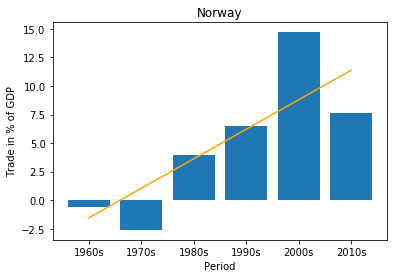

In [77]:
# Norway
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Norway'], label=labels)
plt.plot(all_periods2['Period'], lrnorway.coef_*all_periods2['Time']+lrnorway.intercept_, color='orange')
plt.title('Norway')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

###### Luxembourg
- Trade balance is upward trending over time

In [78]:
# Trend
lrluxembourg = Ridge()
lrluxembourg.fit(all_periods2[['Time']], all_periods2['Luxembourg'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

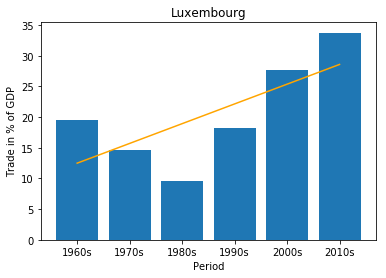

In [79]:
# Luxembourg
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Luxembourg'], label=labels)
plt.plot(all_periods2['Period'], lrluxembourg.coef_*all_periods2['Time']+lrluxembourg.intercept_, color='orange')
plt.title('Luxembourg')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

###### Singapore
- Trade balance is upward trending over time

In [80]:
# Trend
lrsingapore = Ridge()
lrsingapore.fit(all_periods2[['Time']], all_periods2['Singapore'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

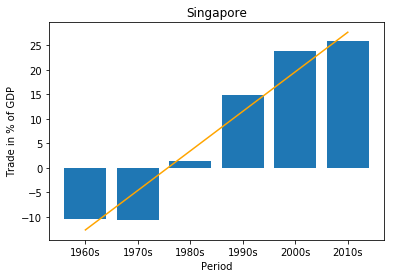

In [81]:
# Singapore
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Singapore'], label=labels)
plt.plot(all_periods2['Period'], lrsingapore.coef_*all_periods2['Time']+lrsingapore.intercept_, color='orange')
plt.title('Singapore')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

###### Ireland
- Trade balance is upward trending over time

In [82]:
# Trend
lrIreland = Ridge()
lrIreland.fit(all_periods2[['Time']], all_periods2['Ireland'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

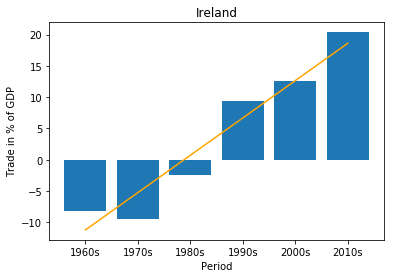

In [83]:
# Ireland
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Ireland'], label=labels)
plt.plot(all_periods2['Period'], lrIreland.coef_*all_periods2['Time']+lrIreland.intercept_, color='orange')
plt.title('Ireland')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

###### Switzerland
- Trade balance is upward trending over time

In [84]:
# Trend
lrSwitzerland = Ridge()
lrSwitzerland.fit(all_periods2[['Time']], all_periods2['Switzerland'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

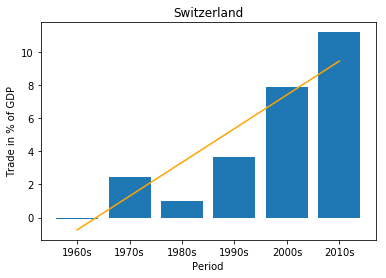

In [85]:
# Switzerland
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Switzerland'], label=labels)
plt.plot(all_periods2['Period'], lrSwitzerland.coef_*all_periods2['Time']+lrSwitzerland.intercept_, color='orange')
plt.title('Switzerland')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

###### Kuwait
- Although Trade balance is downward trending over time, the trade balance itself (a surplus in this case) is very huge

In [86]:
# Trend
lrKuwait = Ridge()
lrKuwait.fit(all_periods2[['Time']], all_periods2['Kuwait'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

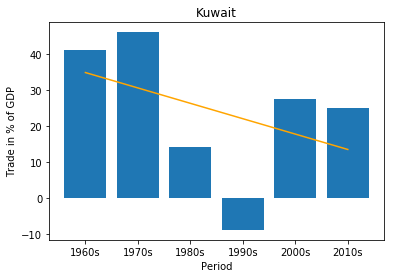

In [87]:
# Kuwait
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Kuwait'], label=labels)
plt.plot(all_periods2['Period'], lrKuwait.coef_*all_periods2['Time']+lrKuwait.intercept_, color='orange')
plt.title('Kuwait')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

###### Brunei
- Although Trade balance is downward trending over time, the trade balance itself (a surplus in this case) is very huge

In [88]:
# Trend
lrBrunei = Ridge()
lrBrunei.fit(all_periods2[['Time']], all_periods2['Brunei'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

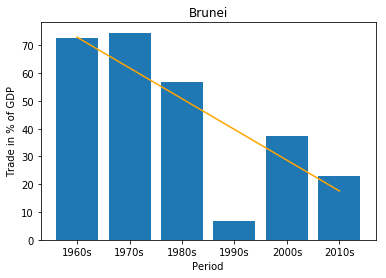

In [89]:
# Brunei
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Brunei'], label=labels)
plt.plot(all_periods2['Period'], lrBrunei.coef_*all_periods2['Time']+lrBrunei.intercept_, color='orange')
plt.title('Brunei')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

##### Bottom countries in per capita income

In [90]:
# Recall Bottom 10 countries in per capita income during 2019
bottom10_income

2019
country                       
Somalia                    631
Burundi                    644
Central African Republic   794
Congo, Dem. Rep.           838
Niger                      954
Liberia                   1140
Mozambique                1170
Malawi                    1180
Eritrea                   1390
Sierra Leone              1460

In [91]:
# Filter by Bottom 10 countries in per capita income that are in trade database
all_periods2.loc[:, all_periods2.columns.isin(bottom10_income_tr.columns)]

Year   Burundi  Central African Republic  Malawi    Niger  Sierra Leone  \
1960s  -2.1663                  -11.9890 -14.167  -3.8955       -1.3415   
1970s  -4.8518                  -10.7850 -12.781  -8.8880       -3.6570   
1980s -13.4760                  -10.6380  -6.694  -8.0021       -3.0630   
1990s -14.3920                   -5.6990 -14.266  -5.9290       -3.6531   
2000s -18.9620                   -6.9189 -13.375  -9.5310      -14.8570   
2010s -22.7800                  -17.6930  -8.511 -15.3000      -26.8600   

Year   Somalia  
1960s   -8.482  
1970s  -20.089  
1980s  -35.110  
1990s  -28.000  
2000s  -28.000  
2010s  -28.000

###### Burundi
- Trade balance is downward trending over time

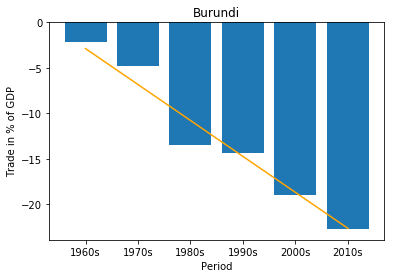

In [92]:
# Trend
lrBurundi = Ridge()
lrBurundi.fit(all_periods2[['Time']], all_periods2['Burundi'])

# Burundi
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Burundi'], label=labels)
plt.plot(all_periods2['Period'], lrBurundi.coef_*all_periods2['Time']+lrBurundi.intercept_, color='orange')
plt.title('Burundi')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

###### Central African Republic
- Trade balance is downward trending over time

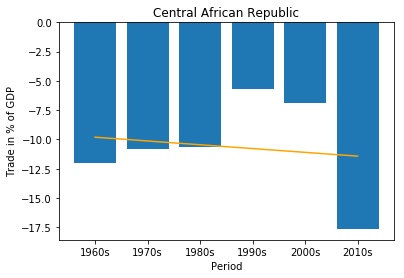

In [93]:
# Trend
lrCAR = Ridge()
lrCAR.fit(all_periods2[['Time']], all_periods2['Central African Republic'])

# Central African Republic
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Central African Republic'], label=labels)
plt.plot(all_periods2['Period'], lrCAR.coef_*all_periods2['Time']+lrCAR.intercept_, color='orange')
plt.title('Central African Republic')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

###### Malawi
- Although Trade balance is upward trending over time, the trade balance itself (a deficit in this case) is very huge
- Moreover, the successful efforts to reduce trade deficit in 1970s & 1980s were quickly dissipated in later periods.

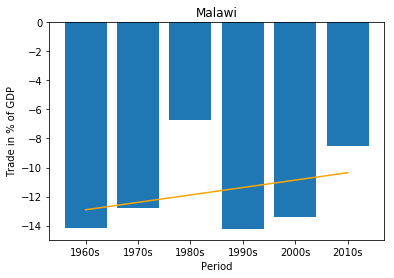

In [94]:
# Trend
lrMalawi = Ridge()
lrMalawi.fit(all_periods2[['Time']], all_periods2['Malawi'])

# Malawi
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Malawi'], label=labels)
plt.plot(all_periods2['Period'], lrMalawi.coef_*all_periods2['Time']+lrMalawi.intercept_, color='orange')
plt.title('Malawi')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

###### Niger
- Trade balance is downward trending over time

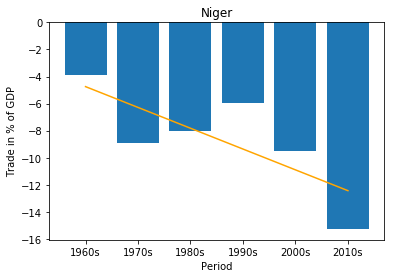

In [95]:
# Trend
lrNiger = Ridge()
lrNiger.fit(all_periods2[['Time']], all_periods2['Niger'])

# Burundi
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Niger'], label=labels)
plt.plot(all_periods2['Period'], lrNiger.coef_*all_periods2['Time']+lrNiger.intercept_, color='orange')
plt.title('Niger')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

###### Sierra Leone
- Trade balance is downward trending over time

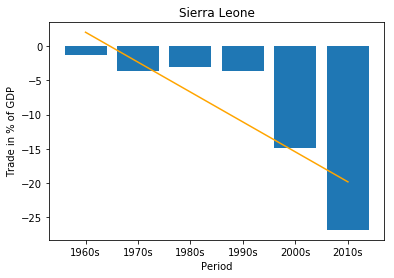

In [96]:
# Trend
lrSL = Ridge()
lrSL.fit(all_periods2[['Time']], all_periods2['Sierra Leone'])

# Burundi
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Sierra Leone'], label=labels)
plt.plot(all_periods2['Period'], lrSL.coef_*all_periods2['Time']+lrSL.intercept_, color='orange')
plt.title('Sierra Leone')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

###### Somalia
- Trade balance is downward trending over time

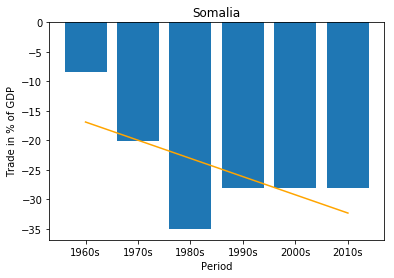

In [97]:
# Trend
lrSomalia = Ridge()
lrSomalia.fit(all_periods2[['Time']], all_periods2['Somalia'])

# Burundi
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(all_periods2['Period'], all_periods2['Somalia'], label=labels)
plt.plot(all_periods2['Period'], lrSomalia.coef_*all_periods2['Time']+lrSomalia.intercept_, color='orange')
plt.title('Somalia')
plt.xlabel('Period')
plt.ylabel('Trade in % of GDP');

### 3.1 Answer:
- It's clearly seen that Top countries in per capita income levels (in 2019) tended to have more trade balances on average (during 1960-2019), than bottom countries in per capita income.
- Even Brunei & Kuwait (two of the top) show a downtrending trade balance, the trade balance itself is very large.
- The bottom countries have deteriorating trade balances that get worsening over time
- Even Malawi (one of the bottom) show an uptrending trade balance, the trade balance itself is negative. It was clear that their efforts to improve trade balance were inconsistent (i.e. in sometimes it improves then deteriorates)

### 3.2 Is there a relation between tax revenues and the per capita income level?
> Here I'll use histogram charts that can give insights about the pattern of tax revenues (as % of GDP) that is associated with Top 10 per capita income countries, as well as Bottom 10 per capita income countries.
> Moreover, I'll get the average tax revenues for both groups and compare them in a bar chart

#### A) Histogram plots
- Here, I'll use histograms to get perliminary visual inspection about each country in each group.
- I'll mainly focus on looking at taxes and its corresponding most frequent times.
- **Purpose of histogram plots:** If there's very big difference (visually) between the 2 groups regarding the most frequent tax revenues (for example group A > group B), then I'll conclude that group A has more tax revenues than group B
- If there was no decisive difference from the histogram plot, then I'll use mean & median (as measures of center) and use them to compare the 2 groups

> The below is presentation for each country alongwith findings for each plot. At the end of histogram sub-section, I'll provide an interactive experience, where the user can manually select the country of his chocie and the histogram will be shown automatically

In [98]:
# Copy dataframe
tax_tr4 = tax_tr3

#### Top 10 Countries in Per Capita Income


In [99]:
# Recall Top 10 countries in per capita income during 2019
top10_income

2019
country                     
Qatar                 113000
Luxembourg             94300
Singapore              90100
Brunei                 72400
Ireland                72400
Norway                 66300
United Arab Emirates   65700
Kuwait                 64100
Monaco                 61400
Switzerland            59000

In [100]:
# Filter by Top 10 countries in per capita income that are in taxes database
tax_tr4.loc[:, tax_tr4.columns.isin(top10_income_tr.columns)]

Year  Ireland    Kuwait  Luxembourg  Norway  Singapore  Switzerland  \
1972    0.218  0.374000       0.161   0.230      0.146       0.0700   
1973    0.221  0.372000       0.166   0.207      0.148       0.0666   
1974    0.220  0.327000       0.171   0.205      0.151       0.0682   
1975    0.213  0.233400       0.200   0.204      0.166       0.0690   
1976    0.236  0.139800       0.196   0.215      0.160       0.0791   
1977    0.225  0.046200       0.220   0.221      0.167       0.0760   
1978    0.221  0.076000       0.229   0.218      0.159       0.0778   
1979    0.219  0.021800       0.211   0.222      0.160       0.0734   
1980    0.242  0.027000       0.216   0.251      0.170       0.0751   
1981    0.253  0.037400       0.220   0.263      0.179       0.0753   
1982    0.264  0.034400       0.222   0.253      0.189       0.0783   
1983    0.275  0.032400       0.246   0.246      0.188       0.0786   
1984    0.281  0.031300       0.240   0.245      0.177       0.0803   
1985    0.272  0.019400       0.240   0.257      0.157       0.0790   
1986    0.273  0.021000       0.233   0.256      0.127       0.0856   
1987    0.274  0.012700       0.235   0.236      0.131       0.0820   
1988    0.287  0.012300       0.228   0.222      0.141       0.0859   
1989    0.258  0.011800       0.218   0.205      0.157       0.0806   
1990    0.253  0.015500       0.221   0.213      0.145       0.0809   
1991    0.256  0.002560       0.209   0.216      0.152       0.0785   
1992    0.259  0.000858       0.214   0.207      0.161       0.0801   
1993    0.258  0.010900       0.229   0.207      0.163       0.0739   
1994    0.270  0.014200       0.242   0.217      0.166       0.0792   
1995    0.265  0.011500       0.236   0.230      0.158       0.0800   
1996    0.272  0.009650       0.237   0.239      0.159       0.0844   
1997    0.269  0.011700       0.250   0.239      0.153       0.0842   
1998    0.265  0.014900       0.255   0.240      0.140       0.0939   
1999    0.267  0.013400       0.247   0.243      0.145       0.0904   
2000    0.264  0.011900       0.254   0.267      0.149       0.1020   
2001    0.242  0.010400       0.251   0.261      0.146       0.0921   
2002    0.235  0.011800       0.247   0.272      0.127       0.0919   
2003    0.242  0.013200       0.247   0.259      0.124       0.0919   
2004    0.251  0.013200       0.243   0.274      0.116       0.0922   
2005    0.255  0.010300       0.255   0.283      0.116       0.0943   
2006    0.268  0.009700       0.242   0.289      0.118       0.0952   
2007    0.259  0.010900       0.247   0.282      0.128       0.0936   
2008    0.237  0.008760       0.247   0.279      0.138       0.0991   
2009    0.220  0.009710       0.252   0.260      0.130       0.0968   
2010    0.218  0.009790       0.250   0.269      0.128       0.0972   
2011    0.220  0.008000       0.246   0.277      0.131       0.0965   
2012    0.225  0.007160       0.257   0.270      0.136       0.0952   
2013    0.229  0.007770       0.259   0.252      0.133       0.0960   
2014    0.231  0.008900       0.257   0.236      0.136       0.0940   
2015    0.188  0.013800       0.250   0.222      0.131       0.0984   
2016    0.189  0.013800       0.249   0.221      0.133       0.0973   
2017    0.183  0.013800       0.252   0.225      0.140       0.1040   
2018    0.183  0.013800       0.265   0.239      0.131       0.1010   
2019    0.183  0.013800       0.265   0.239      0.131       0.1010   

Year  United Arab Emirates  
1972              0.009920  
1973              0.009920  
1974              0.009920  
1975              0.009920  
1976              0.009920  
1977              0.009920  
1978              0.009920  
1979              0.009920  
1980              0.009920  
1981              0.009920  
1982              0.009920  
1983              0.009920  
1984              0.009920  
1985              0.009920  
1986              0.009920  
1987              0.009920  
1988              0.009920 

##### Norway
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 24%
- **Mean** is around 24.1%
- **Median** is around 23.8%

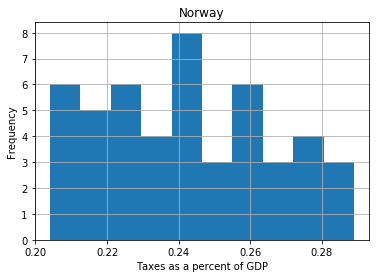

In [101]:
# Histogram plots
tax_tr4['Norway'].hist()
plt.title('Norway')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [102]:
# Average Taxes (as a percent of GDP)
tax_tr4['Norway'].mean()

0.24131250000000004

In [103]:
# Median Taxes (as a percent of GDP)
tax_tr4['Norway'].median()

0.23899999999999999

##### Ireland
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 26%
- **Mean** is around 24.1%
- **Median** is around 24.6%

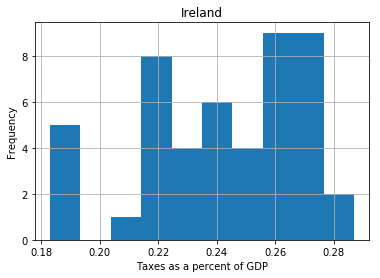

In [104]:
# Histogram plots
tax_tr4['Ireland'].hist()
plt.title('Ireland')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [105]:
# Average Taxes (as a percent of GDP)
tax_tr4['Ireland'].mean()

0.24183333333333334

In [106]:
# Median Taxes (as a percent of GDP)
tax_tr4['Ireland'].median()

0.2465

##### Luxembourg
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 24%
- **Mean** is around 23.3%
- **Median** is around 24.6%

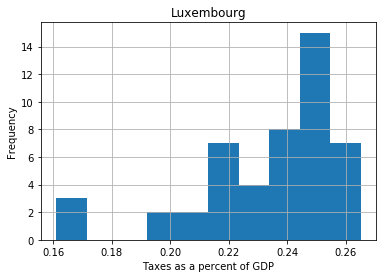

In [107]:
# Histogram plots
tax_tr4['Luxembourg'].hist()
plt.title('Luxembourg')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [108]:
# Average Taxes (as a percent of GDP)
tax_tr4['Luxembourg'].mean()

0.23389583333333333

In [109]:
# Median Taxes (as a percent of GDP)
tax_tr4['Ireland'].median()

0.2465

##### Singapore
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 13%
- **Mean** is around 14.6%
- **Median** is around 14.5%

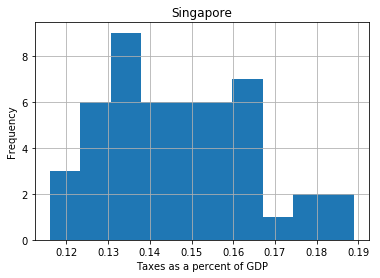

In [110]:
# Histogram plots
tax_tr4['Singapore'].hist()
plt.title('Singapore')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [111]:
# Average Taxes (as a percent of GDP)
tax_tr4['Singapore'].mean()

0.14660416666666667

In [112]:
# Median Taxes (as a percent of GDP)
tax_tr4['Singapore'].median()

0.14549999999999999

##### Switzerland
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 8%
- **Mean** is around 8.6%
- **Median** is around 8.4%

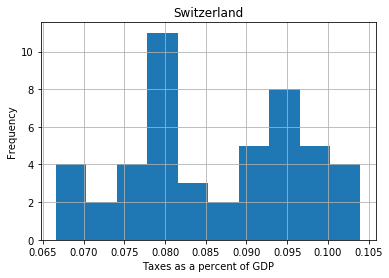

In [113]:
# Histogram plots
tax_tr4['Switzerland'].hist()
plt.title('Switzerland')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [114]:
# Average Taxes (as a percent of GDP)
tax_tr4['Switzerland'].mean()

0.086166666666666669

In [115]:
# Median Taxes (as a percent of GDP)
tax_tr4['Switzerland'].median()

0.084999999999999992

##### Qatar
> This country isn't found in the tax revenues CSV file from the beginning

##### Brunei
> This country isn't found in the tax revenues CSV file from the beginning

##### United Arab Emirates
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 0.10%
- **Mean** is around 0.7%
- **Median** is around 0.9%

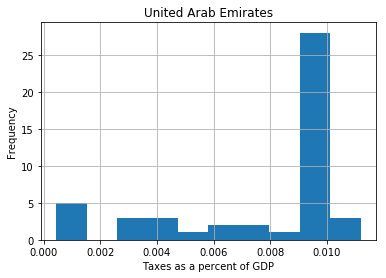

In [116]:
# Histogram plots
tax_tr4['United Arab Emirates'].hist()
plt.title('United Arab Emirates')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [117]:
# Average Taxes (as a percent of GDP)
tax_tr4['United Arab Emirates'].mean()

0.0078364166666666669

In [118]:
# Median Taxes (as a percent of GDP)
tax_tr4['United Arab Emirates'].median()

0.00992

##### Kuwait
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 0-5%
- **Mean** is around 4.4%
- **Median** is around 1.3%

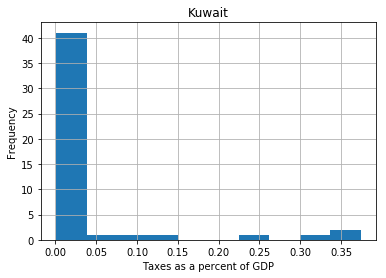

In [119]:
# Histogram plots
tax_tr4['Kuwait'].hist()
plt.title('Kuwait')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [120]:
# Average Taxes (as a percent of GDP)
tax_tr4['Kuwait'].mean()

0.044907458333333337

In [121]:
# Median Taxes (as a percent of GDP)
tax_tr4['Kuwait'].median()

0.013299999999999999

##### Monaco
> This country isn't found in the tax revenues CSV file from the beginning

#### Bottom 10 Countries in Per Capita Income


In [122]:
# Filter by Top 10 countries in per capita income that are in taxes database
tax_tr4.loc[:, tax_tr4.columns.isin(bottom10_income_tr.columns)]

Year  Burundi  Central African Republic  Congo, Dem. Rep.  Liberia  Malawi  \
1972   0.1030                  0.062100            0.0938   0.0764   0.145   
1973   0.1030                  0.062100            0.0943   0.0764   0.145   
1974   0.1070                  0.062100            0.1050   0.0764   0.145   
1975   0.0886                  0.062100            0.0803   0.0764   0.145   
1976   0.1140                  0.062100            0.0611   0.0764   0.145   
1977   0.1350                  0.062100            0.0622   0.0764   0.145   
1978   0.1500                  0.062100            0.0549   0.0764   0.145   
1979   0.1410                  0.062100            0.0722   0.0764   0.145   
1980   0.1300                  0.062100            0.0812   0.0764   0.145   
1981   0.1160                  0.062100            0.0741   0.0764   0.145   
1982   0.1195                  0.062100            0.0698   0.0764   0.145   
1983   0.1230                  0.062100            0.0705   0.0764   0.145   
1984   0.1265                  0.062100            0.0832   0.0764   0.145   
1985   0.1300                  0.062100            0.1010   0.0764   0.145   
1986   0.1335                  0.062100            0.0871   0.0764   0.145   
1987   0.1370                  0.062100            0.0875   0.0764   0.145   
1988   0.1405                  0.062100            0.0932   0.0764   0.145   
1989   0.1440                  0.062100            0.1070   0.0764   0.145   
1990   0.1475                  0.062100            0.1070   0.0764   0.145   
1991   0.1510                  0.062100            0.1070   0.0764   0.145   
1992   0.1510                  0.062100            0.1070   0.0764   0.145   
1993   0.1490                  0.062100            0.1070   0.0764   0.145   
1994   0.1560                  0.062100            0.1070   0.0764   0.145   
1995   0.1670                  0.062100            0.1070   0.0764   0.145   
1996   0.1340                  0.062100            0.1070   0.0764   0.145   
1997   0.1140                  0.062100            0.1070   0.0764   0.145   
1998   0.1430                  0.062100            0.1070   0.0764   0.145   
1999   0.1360                  0.062100            0.1070   0.0764   0.145   
2000   0.1360                  0.062100            0.1070   0.0764   0.145   
2001   0.1360                  0.062100            0.1070   0.0764   0.145   
2002   0.1360                  0.062100            0.1070   0.0764   0.145   
2003   0.1360                  0.062100            0.1070   0.0764   0.145   
2004   0.1360                  0.062100            0.1070   0.0764   0.145   
2005   0.1360                  0.067275            0.1070   0.0764   0.145   
2006   0.1360                  0.072450            0.1070   0.0724   0.145   
2007   0.1360                  0.077625            0.1070   0.1020   0.145   
2008   0.1360                  0.082800            0.1070   0.0984   0.145   
2009   0.1360                  0.079100            0.1070   0.1052   0.145   
2010   0.1360                  0.084100            0.1070   0.1120   0.154   
2011   0.1360                  0.075400            0.1070   0.1110   0.155   
2012   0.1360                  0.081700            0.1070   0.1330   0.136   
2013   0.1360                  0.061350            0.1070   0.1290   0.141   
2014   0.1360                  0.041000            0.1070   0.1290   0.159   
2015   0.1360                  0.054500            0.1070   0.1290   0.152   
2016   0.1360                  0.068100            0.1070   0.1290   0.155   
2017   0.1360                  0.070800            0.1070   0.1290   0.173   
2018   0.1360                  0.086400            0.1070   0.1290   0.174   
2019   0.1360                  0.086400            0.1070   0.1290   0.173   

Year  Mozambique   Niger  
1972       0.148  0.0942  
1973       0.148  0.0942  
1974       0.148  0.0942  
1975       0.148  0.0942  
1976       0.148  0.0942  
1977       0.14

##### Burundi
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 14%
- **Mean** is around 13.3%
- **Median** is around 13.6%

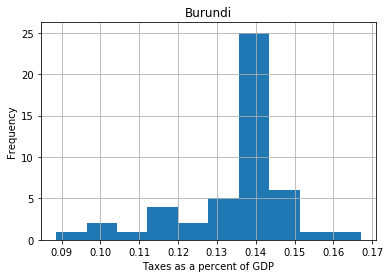

In [123]:
# Histogram plots
tax_tr4['Burundi'].hist()
plt.title('Burundi')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [124]:
# Average Taxes (as a percent of GDP)
tax_tr4['Burundi'].mean()

0.13354374999999999

In [125]:
# Median Taxes (as a percent of GDP)
tax_tr4['Burundi'].median()

0.13600000000000001

##### Central African Republic
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 6%
- **Mean** is around 6.5%
- **Median** is around 6.2%

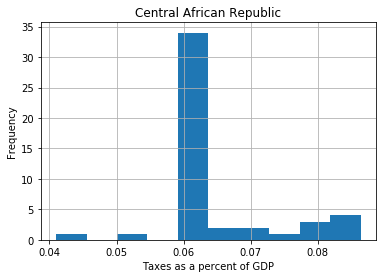

In [126]:
# Histogram plots
tax_tr4['Central African Republic'].hist()
plt.title('Central African Republic')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [127]:
# Average Taxes (as a percent of GDP)
tax_tr4['Central African Republic'].mean()

0.065381250000000002

In [128]:
# Median Taxes (as a percent of GDP)
tax_tr4['Central African Republic'].median()

0.062100000000000002

##### Congo, Dem. Rep.
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 10%
- **Mean** is around 9.7%
- **Median** is around 10.7%

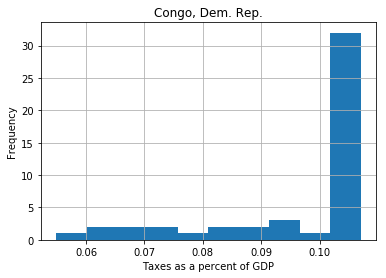

In [129]:
# Histogram plots
tax_tr4['Congo, Dem. Rep.'].hist()
plt.title('Congo, Dem. Rep.')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [130]:
# Average Taxes (as a percent of GDP)
tax_tr4['Congo, Dem. Rep.'].mean()

0.097674999999999998

In [131]:
# Median Taxes (as a percent of GDP)
tax_tr4['Congo, Dem. Rep.'].median()

0.107

##### Liberia
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 7-8%
- **Mean** is around 8.8%
- **Median** is around 7.6%

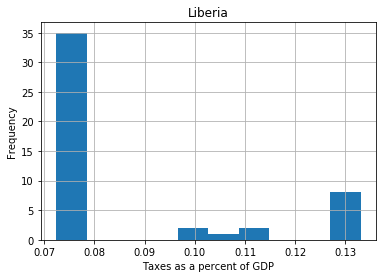

In [132]:
# Histogram plots
tax_tr4['Liberia'].hist()
plt.title('Liberia')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [133]:
# Average Taxes (as a percent of GDP)
tax_tr4['Liberia'].mean()

0.088220833333333346

In [134]:
# Median Taxes (as a percent of GDP)
tax_tr4['Liberia'].median()

0.076399999999999996

##### Malawi
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 14.5%
- **Mean** is around 14.8%
- **Median** is around 14.5%

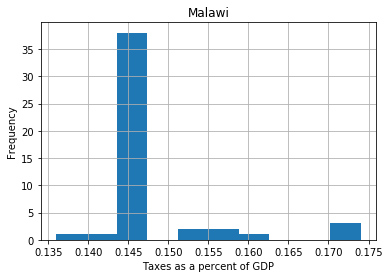

In [170]:
# Histogram plots
tax_tr4['Malawi'].hist()
plt.title('Malawi')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [171]:
# Average Taxes (as a percent of GDP)
tax_tr4['Malawi'].mean()

0.14754166666666665

In [172]:
# Median Taxes (as a percent of GDP)
tax_tr4['Malawi'].median()

0.14499999999999999

##### Mozambique
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 16%
- **Mean** is around 15.9%
- **Median** is around 14.8%

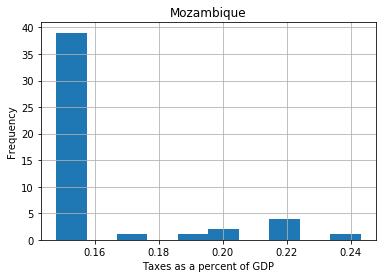

In [173]:
# Histogram plots
tax_tr4['Mozambique'].hist()
plt.title('Mozambique')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [174]:
# Average Taxes (as a percent of GDP)
tax_tr4['Mozambique'].mean()

0.15945833333333337

In [175]:
# Median Taxes (as a percent of GDP)
tax_tr4['Mozambique'].median()

0.14800000000000002

##### Niger
- The country's **histogram plot** shows that most of the time tax revenues (as % of GDP) were around 11.5%
- **Mean** is around 11.4%
- **Median** is around 11.8%

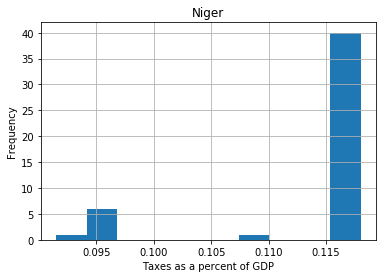

In [176]:
# Histogram plots
tax_tr4['Niger'].hist()
plt.title('Niger')
plt.xlabel('Taxes as a percent of GDP')
plt.ylabel('Frequency');

In [177]:
# Average Taxes (as a percent of GDP)
tax_tr4['Niger'].mean()

0.11430208333333332

In [178]:
# Median Taxes (as a percent of GDP)
tax_tr4['Niger'].median()

0.11800000000000001

#### Interactive Histogram Plots for Top Per Capita Income Countries:

In [179]:
# Create a dictionary of Top Income Countries
TOP_DATA = { '1': 'Ireland',
              '2': 'Kuwait',
              '3': 'Luxembourg',
              '4': 'Norway',
              '5': 'Singapore',
              '6': 'Switzerland',
              '7': 'United Arab Emirates'}

In [180]:
#Test
TOP_DATA['7']

'United Arab Emirates'

In [181]:
#create a list of top countries
top_list = ['1', '2', '3', '4', '5', '6', '7']

In [184]:
# Create a function to perform the histogram plot once the user inserts the country
def display_hist_top():
    top_input = input("\n Kindly select a top country. You can type (1) for Ireland, (2) for Kuwait, (3) for Luxembourg, (4) for Norway, (5) for Singapore, (6) for Switzerland, (7) for United Arab Emirates: ")
    
    while top_input not in top_list:
        print("This's invalid input")
        top_input = input("\n Kindly select a top country. You can type (1) for Ireland, (2) for Kuwait, (3) for Luxembourg, (4) for Norway, (5) for Singapore, (6) for Switzerland, (7) for United Arab Emirates: ")
        
    ### Plotting the histogram for the selected country ###
    for i in top_input:
        # Histogram plots
        tax_tr4[TOP_DATA[top_input]].hist()
        plt.title(TOP_DATA[top_input])
        plt.xlabel('Taxes as a percent of GDP')
        plt.ylabel('Frequency');



 Kindly select a top country. You can type (1) for Ireland, (2) for Kuwait, (3) for Luxembourg, (4) for Norway, (5) for Singapore, (6) for Switzerland, (7) for United Arab Emirates: 4


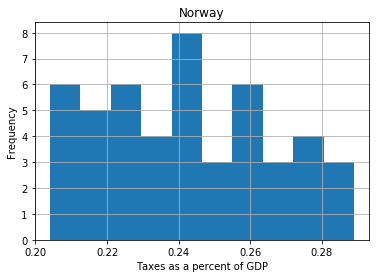

In [187]:
# Run the function
display_hist_top()

In [188]:
# In case the use wants to review another country
restart = input('\nWould you like to select another top country? Enter yes or no.\n').lower()
if restart == 'yes':
    print(display_hist())
else:
    print('\nThank You')


Would you like to select another top country? Enter yes or no.
no

Thank You


#### Interactive Histogram Plots for Bottom Per Capita Income Countries:

In [207]:
# Create a dictionary of Bottom Income Countries
BOTTOM_DATA = { '1': 'Burundi',
              '2': 'Central African Republic',
              '3': 'Congo, Dem. Rep.',
              '4': 'Liberia',
              '5': 'Malawi',
              '6': 'Mozambique',
              '7': 'Niger'}

In [194]:
# Test
BOTTOM_DATA['6']

'Mozambique'

In [195]:
#create a list of bottom countries
bottom_list = ['1', '2', '3', '4', '5', '6', '7']

In [200]:
# Create a function to perform the histogram plot once the user inserts the country
def display_hist_bottom():
    bottom_input = input("\n Kindly select a bottom country. You can type (1) for Burundi, (2) for Central African Republic, (3) for Congo, Dem. Rep., (4) for Liberia, (5) for Malawi, (6) for Mozambique, (7) for Niger: ")
    
    while bottom_input not in bottom_list:
        print("This's invalid input")
        bottom_input = input("\n Kindly select a bottom country. You can type (1) for Burundi, (2) for Central African Republic, (3) for Congo, Dem. Rep., (4) for Liberia, (5) for Malawi, (6) for Mozambique, (7) for Niger: ")
    
        
    ### Plotting the histogram for the selected country ###
    for i in bottom_input:
        # Histogram plots
        tax_tr4[BOTTOM_DATA[bottom_input]].hist()
        plt.title(BOTTOM_DATA[bottom_input])
        plt.xlabel('Taxes as a percent of GDP')
        plt.ylabel('Frequency');



 Kindly select a bottom country. You can type (1) for Burundi, (2) for Central African Republic, (3) for Congo, Dem. Rep., (4) for Liberia, (5) for Malawi, (6) for Mozambique, (7) for Niger: 1


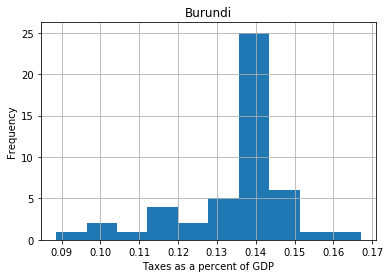

In [201]:
# Run the function
display_hist_bottom()


Would you like to select another bottom country? Enter yes or no.
yes

 Kindly select a bottom country. You can type (1) for Burundi, (2) for Central African Republic, (3) for Congo, Dem. Rep., (4) for Liberia, (5) for Malawi, (6) for Mozambique, (7) for Niger: 3
None


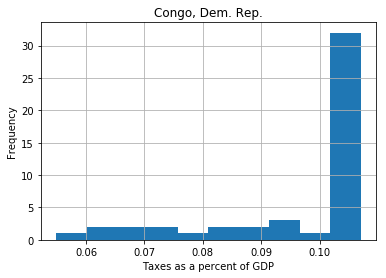

In [206]:
# In case the use wants to review another country
restart2 = input('\nWould you like to select another bottom country? Enter yes or no.\n').lower()
if restart2 == 'yes':
    print(display_hist_bottom())
else:
    print('\nThank You')

> *As there was no decisive diffrence detected from the histogram plots, I'll use mean & media to get a clearer comparison between the top & bottom groups.
Even the mean & median were used on a country level, they didn't yield an easy-to-see difference. So, the comparison on a group level will be better*

#### B) Measures of Center: Mean & Median
- As there was no decisive diffrence detected from the histogram plot, I'll use mean & media to get a clearer comparison between the top & bottom groups.
- Even the mean & median were used on a country level, they didn't yield an easy-to-see difference. So, the comparison on a group level will be better
#### Comparisons among Top & Bottom countries in per capita income
- To make a good comparison between groups (top & bottom), I'll use mean to get an insight about the average tax revenues in each group
- As there are some outliers within the same group, I'll also use the median to get a better measure
- Then, I'll compare (the mean & median) for each group.

##### Top countries in per capita income

In [144]:
# First summarize taxes dataframe to only represent countries in the top 10 
tax_top_summary = tax_tr4.loc[:, tax_tr4.columns.isin(top10_income_tr.columns)]

In [145]:
tax_top_summary.head()

Year  Ireland  Kuwait  Luxembourg  Norway  Singapore  Switzerland  \
1972    0.218  0.3740       0.161   0.230      0.146       0.0700   
1973    0.221  0.3720       0.166   0.207      0.148       0.0666   
1974    0.220  0.3270       0.171   0.205      0.151       0.0682   
1975    0.213  0.2334       0.200   0.204      0.166       0.0690   
1976    0.236  0.1398       0.196   0.215      0.160       0.0791   

Year  United Arab Emirates  
1972               0.00992  
1973               0.00992  
1974               0.00992  
1975               0.00992  
1976               0.00992

In [146]:
tax_top_avg = tax_top_summary.mean()
tax_top_avg

Year
Ireland                 0.241833
Kuwait                  0.044907
Luxembourg              0.233896
Norway                  0.241313
Singapore               0.146604
Switzerland             0.086167
United Arab Emirates    0.007836
dtype: float64

In [147]:
# Average of all Top countries
tax_top_avg.mean()

0.14322233928571432

In [148]:
# Median of all Top countries
tax_top_avg.median()

0.14660416666666665

##### Bottom countries in per capita income

In [149]:
# Second, I summarize taxes dataframe to only represent countries in the bottom 10 
tax_bottom_summary = tax_tr4.loc[:, tax_tr4.columns.isin(bottom10_income_tr.columns)]
tax_bottom_summary.head()

Year  Burundi  Central African Republic  Congo, Dem. Rep.  Liberia  Malawi  \
1972   0.1030                    0.0621            0.0938   0.0764   0.145   
1973   0.1030                    0.0621            0.0943   0.0764   0.145   
1974   0.1070                    0.0621            0.1050   0.0764   0.145   
1975   0.0886                    0.0621            0.0803   0.0764   0.145   
1976   0.1140                    0.0621            0.0611   0.0764   0.145   

Year  Mozambique   Niger  
1972       0.148  0.0942  
1973       0.148  0.0942  
1974       0.148  0.0942  
1975       0.148  0.0942  
1976       0.148  0.0942

In [150]:
tax_bottom_avg = tax_bottom_summary.mean()
tax_bottom_avg

Year
Burundi                     0.133544
Central African Republic    0.065381
Congo, Dem. Rep.            0.097675
Liberia                     0.088221
Malawi                      0.147542
Mozambique                  0.159458
Niger                       0.114302
dtype: float64

In [151]:
# Average of all Bottom countries
tax_bottom_avg.mean()

0.1151604166666667

In [152]:
# Median of all Top countries
tax_bottom_avg.median()

0.1143020833333334

##### Comparisons using visualizations
- To make a good comparison between groups (top & bottom), I'll use mean & median to get an insight about the average tax revenues in each group and then compare (mean & media) for each group)
- **Using mean**, we can see that there's a difference between he 2 groups (top's taxes = 14.3% VS. bottom's taxes = 11.5%). The top is 24% higher than the bottom
- **Using median**, we can still see that there's a difference between he 2 groups (top's taxes = 14.6% VS. bottom's taxes = 11.4%). The top is 28% higher than the bottom


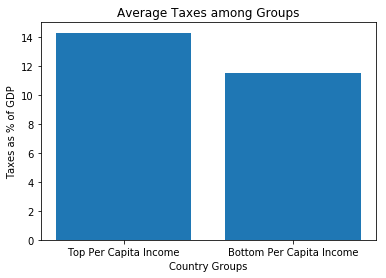

In [153]:
# Plotting Mean comparisons in bar chart
locations = [1, 2]
heights = [100*tax_top_avg.mean(), 100*tax_bottom_avg.mean()] # I multiply by 100 so the ylabel can be easily understood
labels = ['Top Per Capita Income', 'Bottom Per Capita Income']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Taxes among Groups')
plt.xlabel('Country Groups')
plt.ylabel('Taxes as % of GDP');
#plt.xticks(rotation=90) # This is to make labels shown vertically (to be easily visualized);

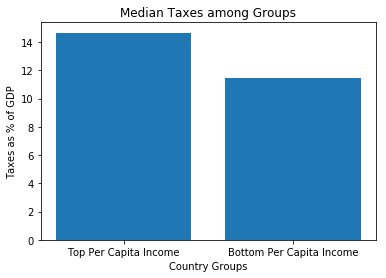

In [154]:
# Plotting Median comparisons in bar chart
locations = [1, 2]
heights = [100*tax_top_avg.median(), 100*tax_bottom_avg.median()] # I multiply by 100 so the ylabel can be easily understood
labels = ['Top Per Capita Income', 'Bottom Per Capita Income']
plt.bar(locations, heights, tick_label=labels)
plt.title('Median Taxes among Groups')
plt.xlabel('Country Groups')
plt.ylabel('Taxes as % of GDP');
#plt.xticks(rotation=90) # This is to make labels shown vertically (to be easily visualized);

### 3.2 Answer:
- It's clearly seen that Top countries in per capita income levels (in 2019) tended to have more tax revenues on average (during 1972-2019), than bottom countries in per capita income.

### 3.3 Is there a relation between FDI affect the per capita income level?

> Here, I'll get the average FDI inflows for both groups and compare them in a bar chart. This will give us insights about the pattern of FDI inflows (as % of GDP) that is associated with Top 10 per capita income countries, as well as Bottom 10 per capita income countries.

In [155]:
# Copy dataframe
fdi_tr4 = fdi_tr3

#### Top 10 Countries in Per Capita Income


In [156]:
# Recall Top 10 countries in per capita income during 2019
top10_income

2019
country                     
Qatar                 113000
Luxembourg             94300
Singapore              90100
Brunei                 72400
Ireland                72400
Norway                 66300
United Arab Emirates   65700
Kuwait                 64100
Monaco                 61400
Switzerland            59000

In [157]:
# Filter by Top 10 countries in per capita income that are in taxes database
fdi_tr4.loc[:, fdi_tr4.columns.isin(top10_income_tr.columns)]

Year    Brunei  Ireland    Kuwait  Luxembourg    Norway     Qatar  Singapore  \
1970  0.478000  0.00727  0.009040       0.180  0.004990  0.018900     0.0484   
1971 -0.088900  0.00490  0.000003       0.180  0.006450  0.070500     0.0512   
1972 -0.014000  0.00490  0.000002       0.180  0.006970  0.000020     0.0592   
1973  0.000670  0.00694  0.000056       0.180  0.009270  0.001660     0.0955   
1974  0.001940  0.00648  0.000009       0.180  0.012700  0.005400     0.0652   
1975  0.000728  0.01670  0.000021       0.180  0.006680  0.003630     0.0518   
1976 -0.021700  0.01820 -0.000039       0.180  0.010300  0.000061     0.0365   
1977 -0.001900  0.01210  0.000094       0.180  0.018500  0.000558     0.0440   
1978  0.002350  0.02560  0.000049       0.180  0.010500  0.002200     0.0399   
1979  0.000125  0.01840  0.000052       0.180  0.007550  0.000811     0.0899   
1980 -0.003970  0.01320  0.000029       0.180  0.000928  0.001380     0.1040   
1981 -0.002540  0.00983  0.000048       0.180  0.010500  0.000436     0.1170   
1982  0.001460  0.01130 -0.000004       0.180  0.007180  0.000488     0.0996   
1983  0.000942  0.00816  0.000002       0.180  0.005390  0.000147     0.0638   
1984  0.000211  0.00603 -0.000278       0.180 -0.002860 -0.002230     0.0659   
1985  0.001040  0.00769  0.000338       0.180 -0.006480  0.001300     0.0546   
1986 -0.002570  0.00871 -0.000812       0.180  0.012900 -0.000291     0.0920   
1987 -0.000025  0.00950 -0.000283       0.180  0.002020 -0.000545     0.1360   
1988  0.000171  0.00681  0.000789       0.180  0.002760 -0.003420     0.1440   
1989  0.003350  0.00491  0.000150       0.180  0.014700 -0.000231     0.0947   
1990  0.001990  0.01260  0.000304       0.180  0.008360  0.000663     0.1540   
1991  0.001350  0.02730  0.000073       0.180 -0.002900  0.006180     0.1070   
1992  0.001670  0.02600  0.001780       0.180 -0.005110  0.005180     0.0423   
1993  0.001950  0.02050  0.000554       0.180  0.008220  0.010100     0.0773   
1994  0.001440  0.01500  0.061100       0.180  0.021500  0.017900     0.1160   
1995  0.123000  0.02080  0.000246       0.180  0.015700  0.011500     0.1360   
1996  0.128000  0.03450  0.011000       0.180  0.023400  0.037400     0.1190   
1997  0.135000  0.02450  0.000652       0.180  0.028000  0.037000     0.1570   
1998  0.142000  0.09840  0.002280       0.180  0.036600  0.033900     0.0695   
1999  0.163000  0.18500  0.002400       0.180  0.035900  0.009140     0.2180   
2000  0.091600  0.25800  0.000432       0.180  0.048700  0.014200     0.1610   
2001  0.010800  0.08840 -0.003200       0.180  0.018300  0.016800     0.1890   
2002  0.039300  0.22900  0.000095       0.180  0.015400  0.032200     0.0665   
2003  0.018900  0.13900 -0.001400       0.145  0.018300  0.026600     0.1750   
2004  0.014400 -0.05470  0.000400       0.149  0.018600  0.037800     0.2120   
2005  0.018400  0.22200  0.002890       0.124  0.032600  0.056100     0.1510   
2006  0.007660  0.09510  0.001190       0.760  0.034400  0.057500     0.2630   
2007  0.021000  0.22200  0.000973      -0.583  0.061900  0.059000     0.2620   
2008  0.015400  0.08470 -0.000040       0.127  0.044500  0.032800     0.0702   
2009  0.030300  0.22800  0.010500       0.531  0.022400  0.083100     0.1210   
2010  0.035100  0.17000  0.011300       0.735  0.050500  0.037300     0.2310   
2011  0.037300  0.09980  0.021200       0.147  0.020700  0.005590     0.1760   
2012  0.045400  0.25800  0.016500       0.450  0.054800  0.002120     0.1870   
2013  0.042900  0.29700  0.008230       0.259 -0.002620 -0.004230     0.2090   
2014  0.033200  0.37700  0.002990       0.286  0.006510  0.005040     0.2180   
2015  0.013200  0.81300  0.002480       0.216  0.018900  0.006620     0.2270   
2016 -0.013200  0.34200  0.002670       0.526 -0.050600  0.005100     0.2220   
2017  0.038600  0.17400  0.000936      -0.106  0.014800  0.005910     0.2860   
2018  0.038000  0.17600 -0.000152      -0.236 -0.015300 -0.011400     0.2440   


#### Comparisons among Top & Bottom countries in per capita income using Mean & Median
- To make a good comparison between groups (top & bottom), I'll use mean to get an insight about FDI in each group
- As there are some outliers within the same group, I'll also use the median to get a better measure
- Then, I'll compare (the mean & median) for each group.

##### Top countries in per capita income

In [158]:
# First summarize taxes dataframe to only represent countries in the top 10 
fdi_top_summary = fdi_tr4.loc[:, fdi_tr4.columns.isin(top10_income_tr.columns)]

In [159]:
fdi_top_summary.head()

Year   Brunei  Ireland    Kuwait  Luxembourg   Norway    Qatar  Singapore  \
1970  0.47800  0.00727  0.009040        0.18  0.00499  0.01890     0.0484   
1971 -0.08890  0.00490  0.000003        0.18  0.00645  0.07050     0.0512   
1972 -0.01400  0.00490  0.000002        0.18  0.00697  0.00002     0.0592   
1973  0.00067  0.00694  0.000056        0.18  0.00927  0.00166     0.0955   
1974  0.00194  0.00648  0.000009        0.18  0.01270  0.00540     0.0652   

Year  Switzerland  United Arab Emirates  
1970      0.00577               0.00108  
1971      0.00577               0.00108  
1972      0.00577               0.00108  
1973      0.00577               0.00108  
1974      0.00577               0.00108

In [160]:
fdi_top_avg = fdi_top_summary.mean()
fdi_top_avg

Year
Brunei                  0.032415
Ireland                 0.095411
Kuwait                  0.003453
Luxembourg              0.186180
Norway                  0.015152
Qatar                   0.014452
Singapore               0.134060
Switzerland             0.027291
United Arab Emirates    0.012239
dtype: float64

In [161]:
# Average of all Top countries
fdi_top_avg.mean()

0.057850303555555538

In [162]:
# Median of all Top countries
fdi_top_avg.median()

0.027291199999999991

In [163]:
# Second, I summarize taxes dataframe to only represent countries in the bottom 10 
fdi_bottom_summary = fdi_tr4.loc[:, fdi_tr4.columns.isin(bottom10_income_tr.columns)]
fdi_bottom_summary.head()

Year   Burundi  Central African Republic  Congo, Dem. Rep.  Eritrea  Liberia  \
1970  0.000412                  0.006350           0.00132   0.0529   0.0238   
1971  0.001036                  0.003470           0.00103   0.0529   0.0238   
1972  0.001660                  0.006510           0.00170   0.0529   0.0238   
1973  0.001450                 -0.000737           0.00225   0.0529   0.0238   
1974  0.000637                  0.020600           0.00542   0.0529   0.0238   

Year  Malawi  Mozambique    Niger  Sierra Leone  Somalia  
1970  0.0296     0.00607  0.00419       0.01890  0.01390  
1971  0.0263     0.00607 -0.00764       0.01240  0.00513  
1972  0.0249     0.00607  0.00121       0.00817  0.01080  
1973  0.0173     0.00607  0.00106       0.01080  0.00118  
1974  0.0414     0.00607  0.00673       0.01620  0.00150

##### Bottom countries in per capita income

In [164]:
fdi_bottom_avg = fdi_bottom_summary.mean()
fdi_bottom_avg

Year
Burundi                     0.003012
Central African Republic    0.009111
Congo, Dem. Rep.            0.018306
Eritrea                     0.041403
Liberia                     0.114742
Malawi                      0.018792
Mozambique                  0.063624
Niger                       0.019979
Sierra Leone                0.026363
Somalia                     0.004132
dtype: float64

In [165]:
# Average of all Bottom countries
fdi_bottom_avg.mean()

0.031946360799999997

In [166]:
# Median of all Top countries
fdi_bottom_avg.median()

0.019385224999999999

##### Comparisons using visualizations
- To make a good comparison between groups (top & bottom), I'll use mean & median to get an insight about the average FDI in each group and then compare (mean & media) for each group)
- **Using mean**, we can see that there's a big difference between he 2 groups (top's FDI = 5.8% VS. bottom's FDI = 3.2%). The top is 81% higher than the bottom
- **Using median**, we can still see that there's a big difference between he 2 groups (top's FDI = 2.7% VS. bottom's FDI = 1.9%). The top is 42% higher than the bottom


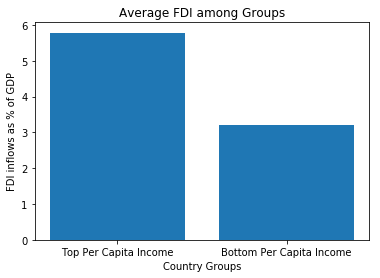

In [167]:
# Plotting Mean comparisons in bar chart
locations = [1, 2]
heights = [100*fdi_top_avg.mean(), 100*fdi_bottom_avg.mean()] # I multiply by 100 so the ylabel can be easily understood
labels = ['Top Per Capita Income', 'Bottom Per Capita Income']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average FDI among Groups')
plt.xlabel('Country Groups')
plt.ylabel('FDI inflows as % of GDP');
#plt.xticks(rotation=90) # This is to make labels shown vertically (to be easily visualized);

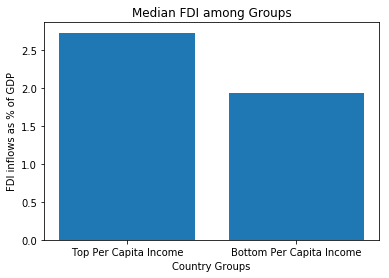

In [168]:
# Plotting Median comparisons in bar chart
locations = [1, 2]
heights = [100*fdi_top_avg.median(), 100*fdi_bottom_avg.median()] # I multiply by 100 so the ylabel can be easily understood
labels = ['Top Per Capita Income', 'Bottom Per Capita Income']
plt.bar(locations, heights, tick_label=labels)
plt.title('Median FDI among Groups')
plt.xlabel('Country Groups')
plt.ylabel('FDI inflows as % of GDP');
#plt.xticks(rotation=90) # This is to make labels shown vertically (to be easily visualized);

### 3.3 Answer:
- It's clearly seen that Top countries in per capita income levels (in 2019) tended to attract more FDI inflows on average (during 1970-2019), than bottom countries in per capita income.

<a id='conclusions'></a>
## 4. Conclusions

### 4.1 Findings:

- The Data Analysis process for top countries in per capita income pinpoints that those countries have some common characteristics that are different from the bottom per capita income countries. These characteristics are:

> **Higher Trade Balance:** Top countries in per capita income tend to have rising trade balances (as % of GDP) over time. This either imply that they managed to decrease trade deficits over time till incurring surpluses or they already have trade surpluses over time even at a decreasing rate. However, bottom countries in per capita income tend to have declining trade balances over time. This either imply that they continued to run trade deficits over time at a worsening rate or their efforts to curb trade deficits were not enough as they still run considerable trade deficits.

> **Higher Tax Revenues:** Top countries in per capita income tend to have more tax revenues (as % of GDP) on average, than bottom countries in per capita income.

> **Higher FDI Inflows:** Top countries in per capita income tend to be more attractive for FDI inflows (as % of GDP) on average, than bottom countries in per capita income.

- One important finding is that bottom per capita income countries are all African. The analysis shows us that that these countries have been suffering over time as seen from deteriorating trade balances, lower tax revenues, and lower FDI inflows
- On the flip side, the majority of top per capita income group are European countries where their indicators have been improving over time. This group also contains Asian countirs, albeit they're all oil rich countries.


### 4.2 Limitations of the analysis:
- **Missing values:** Many countries have lots of missing values. Although interpolation methods solve this issue, I can't be 100% confident that these interpolated values will be creditworthy when moving on to perform a regression analysis. The regression analysis is useful in finding a proven relationship between the dependent and independent variables. Due to these concerns, I didn't move on to the regression analysis step so as not to get misleading results.
- **Further country investigation:** While the visualized plots explain much of the common patterns in each group (top & down), some countires in the same group deviate from the group's common charcteristics. For example, although the top group has higher tax revenues, UAE and Kuwait have low tax revenues. To get reasons for such differences, we may need further details about each country to know its full characteristics.  




## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [208]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0